____
# 1. 환경설정

## 1) 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) 한글 출력 세팅

In [2]:
"""
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)
"""

"\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\n\nimport matplotlib.pyplot as plt\nimport matplotlib.font_manager as fm\nimport warnings\nwarnings.filterwarnings(action='ignore')\n\npath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕\nfont_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10\nplt.rc('font', family=font_name)\n\nfm.fontManager.addfont(path)\n"

In [3]:
import os
from subprocess import run

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

if not os.path.exists(font_path):
    run(['sudo','apt-get','install','-y','fonts-nanum'], check=True)
    run(['sudo','fc-cache','-fv'], check=True)
    # matplotlib 캐시 지우기
    run(['rm','-rf', os.path.expanduser('~/.cache/matplotlib')], check=True)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'           # 나눔 고딕
fm.fontManager.addfont(path)
plt.rc('font', family=fm.FontProperties(fname=path, size=10).get_name()) # 기본 폰트 사이즈 : 10

## 3) import

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

___

# 2. 미션 개요

## 1) 목표

- 포르투갈 은행의 마케팅 담당자
- 고객이 정기 예금을 가입할 가능성을 예측
- 이를 통해 마케팅 캠페인의 효율성을 높이는 것
- 마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악 및 고객의 행동을 이해
- 어떤 상황에서 어떤 고객들이 정기 예금을 가입할지


✅ 최종 목표
    
    - 가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측
    - 그 모델을 통해 도출한 인사이트를 바탕으로 비즈니스 전략을 제시

## 2) 데이터 설명
- 기간: 2008년부터 2010년까지의 은행 마케팅 캠페인 데이터

____

# 3. 데이터 분석

## 1) 전처리

### (1) csv 파일 불러오기

In [6]:
import pandas as pd
df_full = pd.read_csv("/content/drive/MyDrive/(개인)AI_3기/Data/미션4/bank-additional-full.csv", sep=';')

### (2) 데이터 구조 파악

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### (3) 결측값 확인

In [9]:
print(df_full.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
missing_ratio = df_full.isnull().mean().sort_values(ascending=False) # ascending=False : 비율이 큰 것부터 내림차순 정렬
print(missing_ratio)

age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64


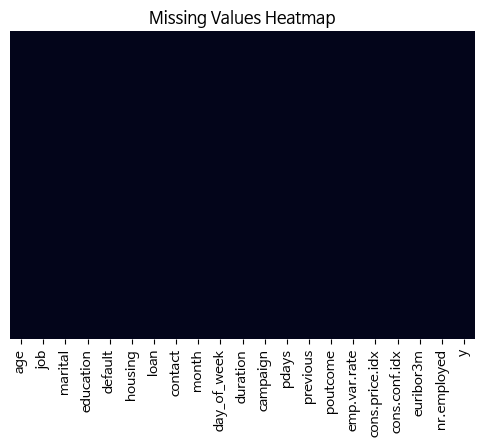

In [11]:
# 결측값 시각화 - 히트맵
plt.figure(figsize=(6,4))
sns.heatmap(df_full.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### (4) 중복값 확인

In [12]:
df_full[df_full.duplicated()]  # 중복된 행 전체 보기

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [13]:
print(df_full.duplicated().sum()) # 중복행 갯수

12


In [14]:
df_full = df_full.drop_duplicates() # 중복 제거

In [15]:
len(df_full)

41176

____

In [16]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
df_full.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,36537
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,NaN
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## 2) 이상치 찾기

### 함수 라이브러리

In [19]:
numeric_cols = ['age','duration','campaign','pdays','previous',
                'emp.var.rate','cons.price.idx','cons.conf.idx',
                'euribor3m','nr.employed',
                'job_code', 'marital_code', 'education_code', 'default_code',
                'housing_code', 'loan_code', 'contact_code', 'month_code',
                'day_of_week_code', 'poutcome_code',
                'y_code','age_group_int']

In [20]:
# 기본 통계 요약 함수
def show_table_numeric_summary(df, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include='number').columns.tolist()
    summary = df[numeric_cols].describe().T
    print(summary)        # count/mean/std/min/25%/50%/75%/max

# 히스토그램 & 박스플롯 함수
def show_plot_hist_box(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f'{col} Histogram')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()

# 상관계수 히트맵
def show_plot_correlation_matrix(df):
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    numeric_cols = [c for c in numeric_cols if not c.endswith('_flag')]

    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Numeric Features Correlation')
    plt.show()

# 그룹별 통계
def show_table_grouped_stats(df, group_col, numeric_cols=None):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include='number').columns.tolist()
    grp = df.groupby(group_col)[numeric_cols] \
            .agg(['count','mean','median','std']) \
            .round(2)
    display(grp)

In [21]:
def show_iqr_detect_outlier(df, column, multiplier=1.5, return_order=None, show_botplot=False):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    min = df[column].min()
    max = df[column].max()

    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)

    count_outliers = outlier_mask.sum()
    pct_outliers = count_outliers / len(df) * 100
    print(f"[{column}] 이상치 개수: {count_outliers}개 ({pct_outliers:.2f}%)")
    print(f"  Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}")
    print(f"  Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
    print(f"  Min={min:.2f}, Max={max:.2f}")

    if show_botplot:
        sns.boxplot(x=df[column])
        plt.title(f'{column} Boxplot')
        plt.tight_layout()
        plt.show()

    if return_order in ['asc', 'desc']:
        outliers = df.loc[outlier_mask, column]
        return outliers.sort_values(ascending=(return_order == 'asc'))

In [103]:
def show_plot_crosstab_stack(df, category_feature, target_feature, title=None, horizontal=False):
    ct = pd.crosstab(df[category_feature], df[target_feature], normalize='index') * 100

    if target_feature =='y':
        ct = ct[['yes', 'no']]

    default_colors = ['skyblue', 'lightcoral']

    if horizontal:
        plt.figure(figsize=(12,20))
        ct.plot(
            kind='barh',
            stacked=True,
            width=0.8,
            #color=default_colors,
            edgecolor='black'
        )
        plt.xlabel('rate(%)')
        plt.ylabel(category_feature)
        plt.title(title)
        plt.legend(title=target_feature, bbox_to_anchor=(1.02, 1), loc='upper left')
    else:
        plt.figure(figsize=(14,6))
        ct.plot(
            kind='bar',
            stacked=True,
            width=0.8,
            #color=default_colors,
            edgecolor='black'
        )
        plt.xlabel(category_feature)
        plt.ylabel('rate(%)')
        plt.title(title)
        plt.legend(title=target_feature, bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_yes_no_grouped(df, category_feature, target_feature, title=None):
    # category_feature × target_feature에 대한 빈도표 생성
    ct_counts = pd.crosstab(df[category_feature], df[target_feature])

    if target_feature == 'y':
        ct_counts = ct_counts[['yes', 'no']]

    ax = ct_counts.plot(
        kind='bar',
        figsize=(14, 6),
        width=0.8,
        color=['skyblue', 'lightcoral'],
        edgecolor='black'
    )

    ax.set_xlabel(category_feature)
    ax.set_ylabel("Count")
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f"{category_feature} 별 'yes' vs 'no' 개수")
    ax.legend(title=target_feature)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + max(ct_counts.values.flatten()) * 0.01,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=9
            )

    plt.tight_layout()
    plt.show()

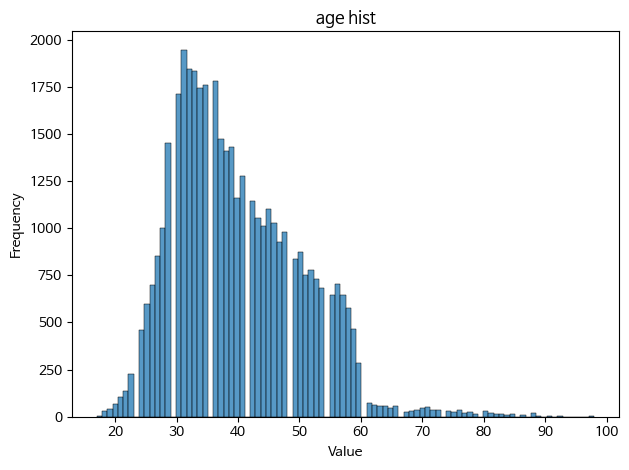

In [24]:
sns.histplot(x='age', data=df_full)
plt.title("age hist")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [25]:
df_full['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [26]:
df_full['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [27]:
df_full['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [28]:
"""
df_full['y_int'] = np.where(df_full['y'] == 'yes', 1, 0)
print(df_full[['y', 'y_int']].head())
print(df_full['y_int'].dtype, df_full['y_int'].value_counts())
"""

"\ndf_full['y_int'] = np.where(df_full['y'] == 'yes', 1, 0)\nprint(df_full[['y', 'y_int']].head())\nprint(df_full['y_int'].dtype, df_full['y_int'].value_counts())\n"

In [29]:
bins  = list(range(0, 101, 10)) + [float('inf')]
labels = [f"{i}-{i+9}" for i in range(0,100,10)] + ["100+"]

df_full['age_group_cat'] = pd.cut(
    df_full['age'],
    bins=bins,
    labels=labels,
    right=False      # 구간의 오른쪽 경계 미포함
)

print(df_full[['age','age_group_cat']].head(10))
print(df_full['age_group_cat'].value_counts().sort_index())

   age age_group_cat
0   56         50-59
1   57         50-59
2   37         30-39
3   40         40-49
4   56         50-59
5   45         40-49
6   59         50-59
7   41         40-49
8   24         20-29
9   25         20-29
age_group_cat
0-9          0
10-19       75
20-29     5592
30-39    16933
40-49    10523
50-59     6861
60-69      724
70-79      318
80-89      140
90-99       10
100+         0
Name: count, dtype: int64


In [30]:
bins  = list(range(0, 101, 10)) + [np.inf]
num_labels = list(range(len(bins)-1))

df_full['age_group_int'] = pd.cut(
    df_full['age'],
    bins=bins,
    labels=num_labels,
    right=False
).astype(int)

print(df_full[['age','age_group_cat','age_group_int']].head())

   age age_group_cat  age_group_int
0   56         50-59              5
1   57         50-59              5
2   37         30-39              3
3   40         40-49              4
4   56         50-59              5


In [31]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  object  
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

### 수치형 데이터

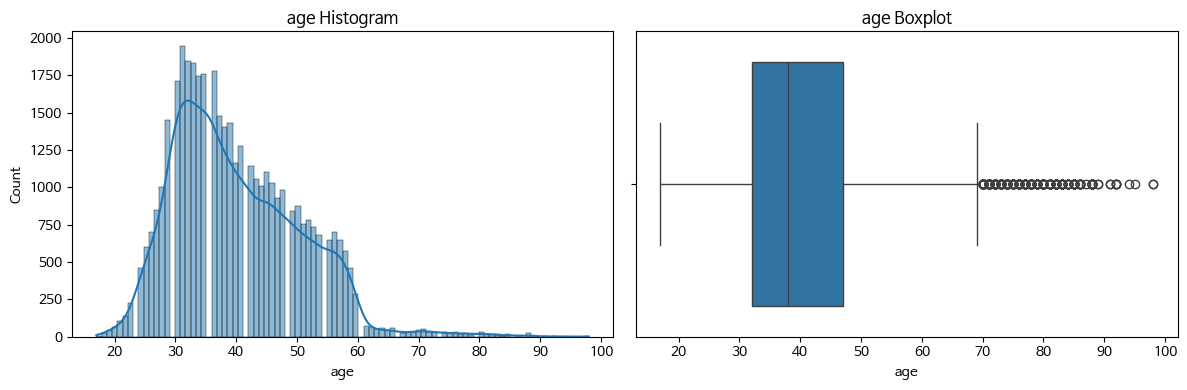

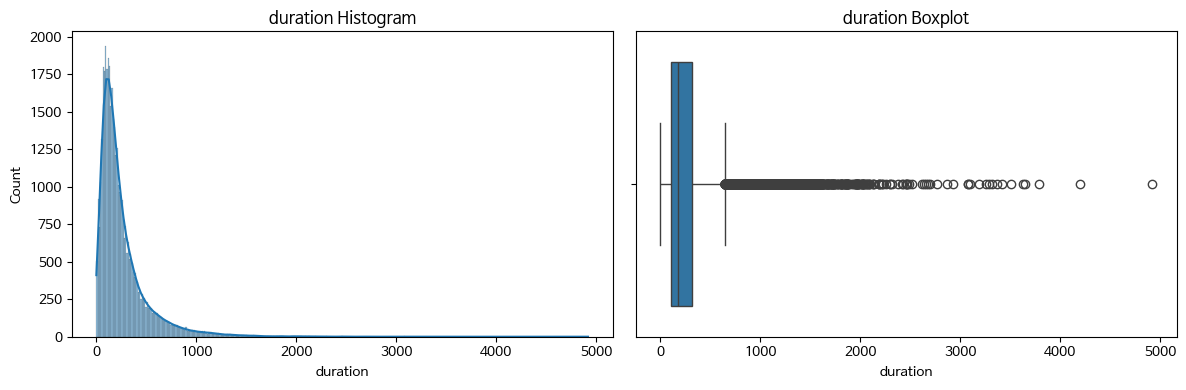

In [32]:
num_cols = df_full[['age', 'duration']]

for col in num_cols:
    show_plot_hist_box(df_full, col)

[age] 이상치 개수: 468개 (1.14%)
  Q1=32.00, Q3=47.00, IQR=15.00
  Lower=9.50, Upper=69.50
  Min=17.00, Max=98.00


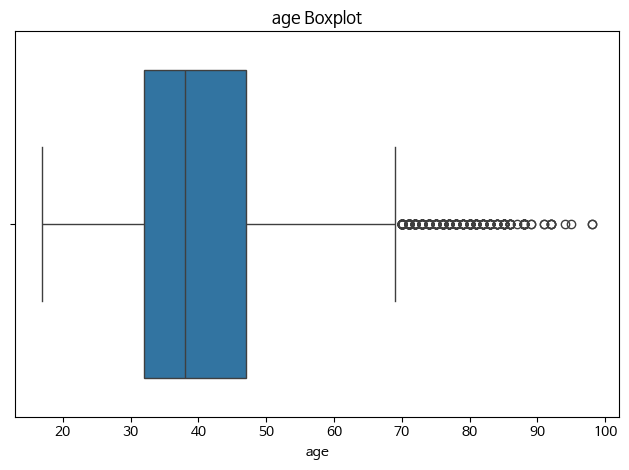

In [33]:
show_iqr_detect_outlier(df_full, 'age', show_botplot=True)

age의 이상치는 지우면 안된다.

[duration] 이상치 개수: 2963개 (7.20%)
  Q1=102.00, Q3=319.00, IQR=217.00
  Lower=-223.50, Upper=644.50
  Min=0.00, Max=4918.00


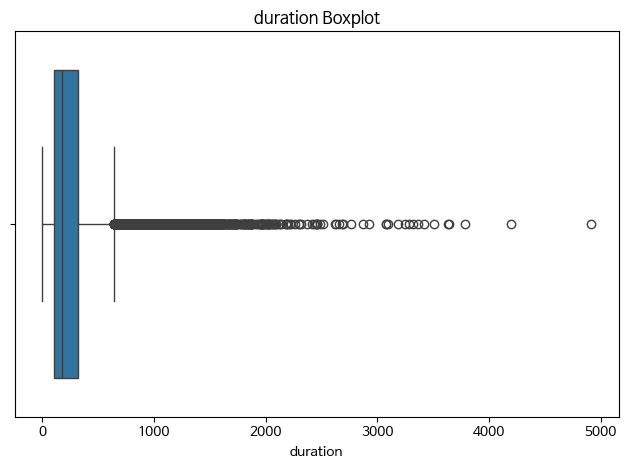

,duration
24091,4918
22192,4199
40537,3785
13820,3643
7727,3631
36043,3509
19632,3422
2313,3366
20996,3322
24043,3284


In [34]:
show_iqr_detect_outlier(df_full, 'duration', return_order= 'desc', show_botplot=True).head(10)

[campaign] 이상치 개수: 2406개 (5.84%)
  Q1=1.00, Q3=3.00, IQR=2.00
  Lower=-2.00, Upper=6.00
  Min=1.00, Max=56.00


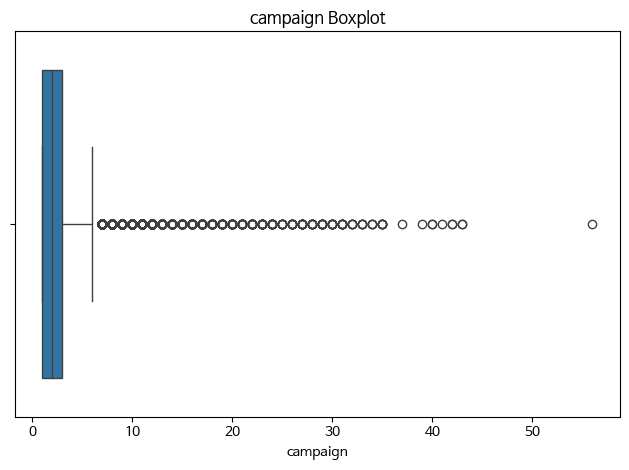

,campaign
4107,56
18728,43
13447,43
4168,42
5304,42
...,...
17965,7
17992,7
17994,7
18179,7


In [35]:
show_iqr_detect_outlier(df_full, 'campaign', return_order= 'desc', show_botplot=True)

[pdays] 이상치 개수: 1515개 (3.68%)
  Q1=999.00, Q3=999.00, IQR=0.00
  Lower=999.00, Upper=999.00
  Min=0.00, Max=999.00


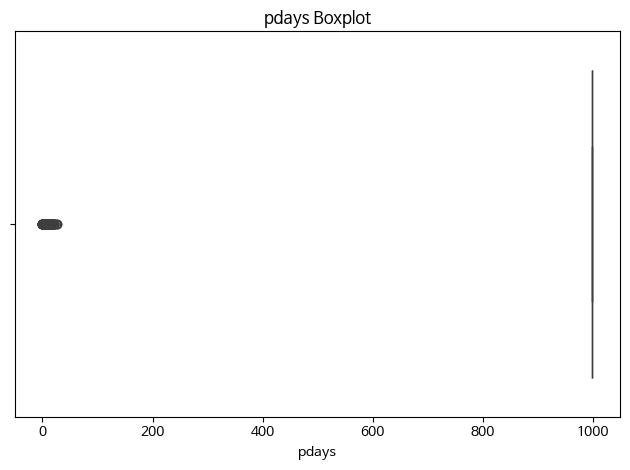

,pdays
40387,0
30688,0
40534,0
40384,0
40382,0
...,...
40489,22
39883,22
40234,25
40243,26


In [36]:
show_iqr_detect_outlier(df_full, 'pdays', return_order= 'asc', show_botplot=True)

In [37]:
df_full[df_full['pdays']==999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group_cat,age_group_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-59,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-59,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-39,3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-49,4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,70-79,7
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,40-49,4
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,50-59,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,40-49,4


In [38]:
df_full['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [39]:
pdays_999 = df_full[df_full['pdays'] == 999][
    ['month', 'day_of_week', 'duration', 'previous', 'poutcome']
]
print(pdays_999.head())

  month day_of_week  duration  previous     poutcome
0   may         mon       261         0  nonexistent
1   may         mon       149         0  nonexistent
2   may         mon       226         0  nonexistent
3   may         mon       151         0  nonexistent
4   may         mon       307         0  nonexistent


In [40]:
print(pdays_999.describe())
print(pdays_999['month'].value_counts())
print(pdays_999['day_of_week'].value_counts())
print(pdays_999['previous'].value_counts())
print(pdays_999['poutcome'].value_counts())

           duration      previous
count  39661.000000  39661.000000
mean     255.902801      0.116185
std      259.178544      0.365032
min        0.000000      0.000000
25%      101.000000      0.000000
50%      177.000000      0.000000
75%      316.000000      0.000000
max     4918.000000      6.000000
month
may    13519
jul     7051
aug     5940
jun     5164
nov     3910
apr     2516
oct      560
mar      456
sep      409
dec      136
Name: count, dtype: int64
day_of_week
thu    8275
mon    8202
wed    7838
tue    7766
fri    7580
Name: count, dtype: int64
previous
0    35551
1     3696
2      349
3       50
4       12
5        2
6        1
Name: count, dtype: int64
poutcome
nonexistent    35551
failure         4110
Name: count, dtype: int64


pdays의 999는 이전에 연락 받은 적 없다는 코드

	•	pdays=999 → 직전 캠페인엔 연락받은 적 없음
	•	previous>0 → 그보다 더 이전 캠페인에서는 연락받은 이력 있음
	•	month/day_of_week → 현재 캠페인의 연락 시점, 따라서 항상 값이 존재
	•	poutcome   → 마지막 과거 캠페인의 결과(999라 해도 이전 캠페인 결과가 남아 있을 수 있음)

In [41]:
show_iqr_detect_outlier(df_full, 'previous')

[previous] 이상치 개수: 5625개 (13.66%)
  Q1=0.00, Q3=0.00, IQR=0.00
  Lower=0.00, Upper=0.00
  Min=0.00, Max=7.00


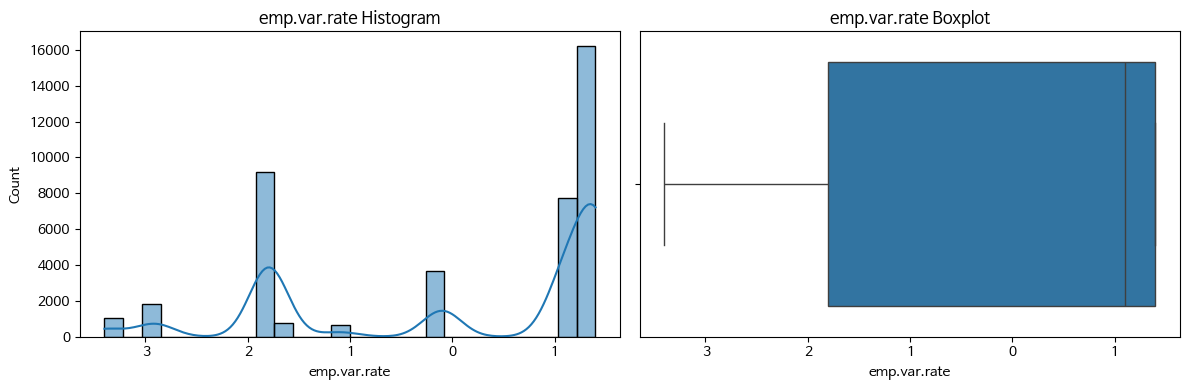

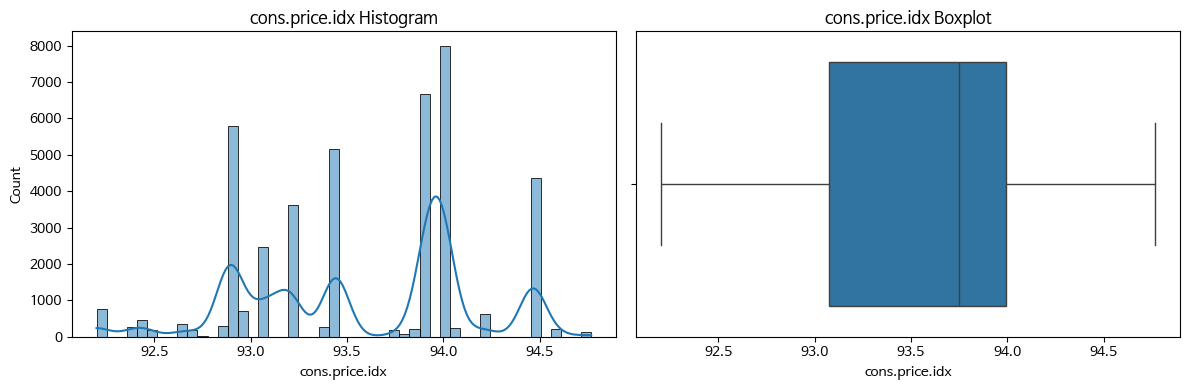

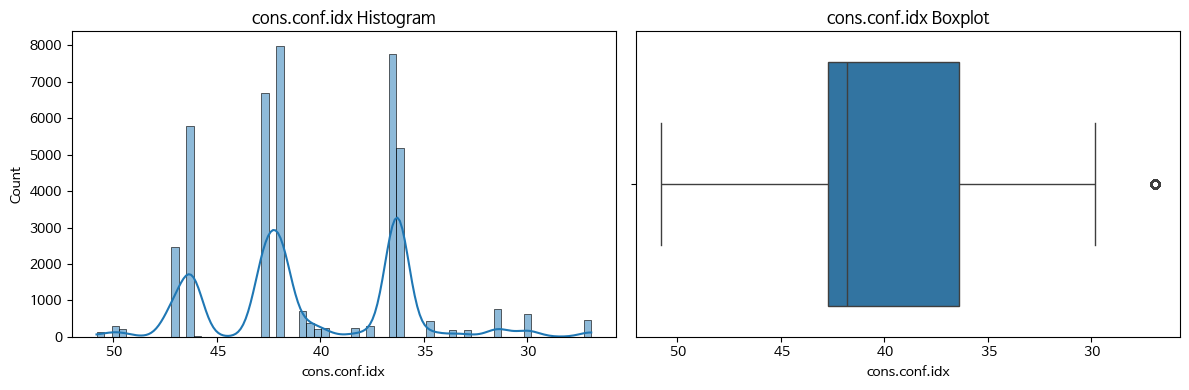

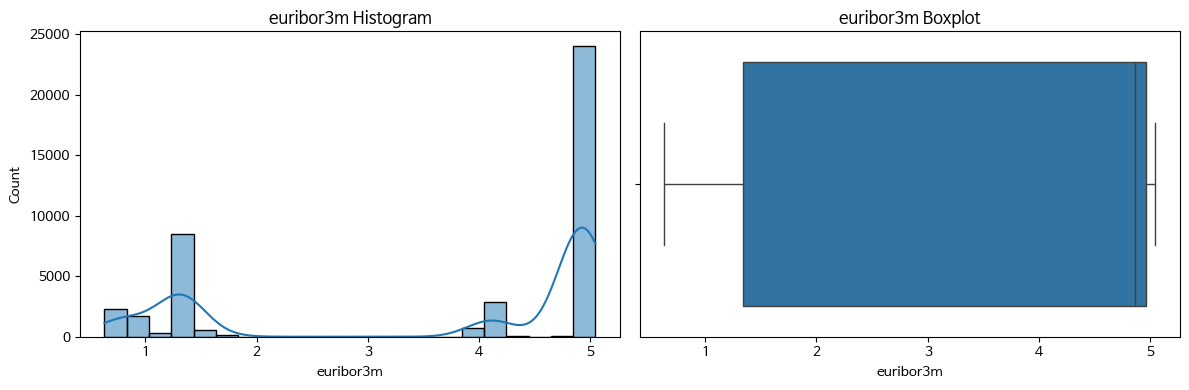

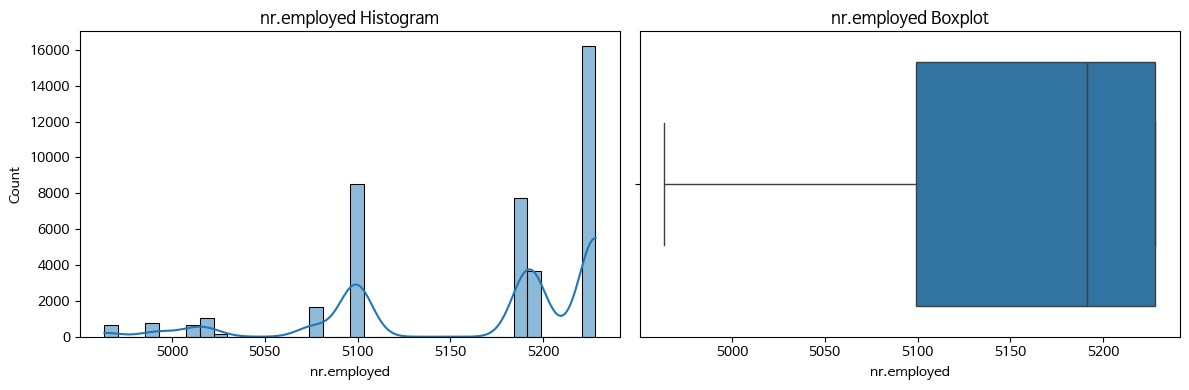

In [42]:
num_cols = df_full[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

for col in num_cols:
    show_plot_hist_box(df_full, col)

사회경제지표 - 고용 변동률 / 고용자 수
 - 고용 시장 안정

    ▶︎ 직업 안정성 확보

 - 여유 자금 확보

    ▶︎ 지속적 수입 기대

 - 예금 가입률 증가

    ▶︎ 미래 대비 자산 관리

▶︎ 고용 시장의 안정감은 소비자들의 여유자금 확보로 이어져
예금 가입률을 높임.


사회경제지표 - 소비자 물가지수

 - 물가 수준 변동

    ▶︎ 생활비 부담 증가

- 소비심리 위축

    ▶︎ 필수 지출 외 억제


 - 예금 수요 변동

    ▶︎ 금리 민감도 상승

 - 저축 형태 변화

    ▶︎ 안전 자산 선호


▶︎ 물가 수준의 안정감에 따라 소비심리가 위축되면서 예금 수요량에 변동이 발생


사회경제지표 - 소비자 신뢰지수
 - 소비자 신뢰지수 상승 시

    ▶︎ 경제 낙관론 확산

    ▶︎ 위험 자산 선호 증가

    ▶︎ 예금 이외 투자 증가

    ▶︎ 정기예금 가입률 감소

 - 소비자 신뢰지수 하락 시

    ▶︎ 경제 불확실성 증가

    ▶︎ 안전 자산 선호도 상승

    ▶︎ 유동성 확보 필요성

    ▶︎ 정기예금 가입률 증가

▶︎ 소비자 신뢰지수 변동에 따라 안전자산인 예금 가입률이 상반되게 움직임

사회경제지표 - 3개월 유리보 금리
 - 매우 낮은 금리 환경

    ▶︎ 자산 가치 하락 우려

    ▶︎ 현금 보유 비용 감소

    ▶︎ 대체 투자 수단 모색

- 보통 수준 금리 환경

    ▶︎ 안정적 수익 기대

    ▶︎ 적절한 위험•수익 균형

    ▶︎ 분산 투자 선호

- 매우 높은 금리 환경

    ▶︎ 예금 상품 매력도 상승

    ▶︎ 위험 자산 회피 경향

    ▶︎ 안전한 수익 추구

▶︎ 시장 금리가 매우 낮거나 매우 높을 때 가입률이 뚜렷한 변동을 보임


### 범주형 데이터

unknown 값이 있는 범주형 컬럼은 적당한 처리해줘야한다.

✅ 결정트리에서 의미없는 분할 / 과적합 위험이 있다.

➡️ 다른 범주로 대체 / 별도 flag 컬럼 추가

In [43]:
cat_cols = df_full.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cols:
    df_full[col] = df_full[col].astype('category')

# unknown을 마지막 범주로 재배치하고 플래그/코드 생성
mappings = {}
for col in cat_cols:
    cats = list(df_full[col].cat.categories)
    if 'unknown' in cats:
        # unknown을 마지막으로 이동
        cats.remove('unknown')
        cats.append('unknown')
        df_full[col] = df_full[col].cat.reorder_categories(cats, ordered=True)

    mappings[col] = dict(enumerate(df_full[col].cat.categories))

    # unknown 플래그
    if 'unknown' in df_full[col].cat.categories:
        df_full[f'{col}_unknown_flag'] = (df_full[col] == 'unknown').astype(int)

    # 라벨 인코딩 (unknown이 마지막 index가 됨)
    df_full[f'{col}_code'] = df_full[col].cat.codes

In [44]:
print(mappings.get('job'))

{0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}


In [45]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     41176 non-null  int64   
 1   job                     41176 non-null  category
 2   marital                 41176 non-null  category
 3   education               41176 non-null  category
 4   default                 41176 non-null  category
 5   housing                 41176 non-null  category
 6   loan                    41176 non-null  category
 7   contact                 41176 non-null  category
 8   month                   41176 non-null  category
 9   day_of_week             41176 non-null  category
 10  duration                41176 non-null  int64   
 11  campaign                41176 non-null  int64   
 12  pdays                   41176 non-null  int64   
 13  previous                41176 non-null  int64   
 14  poutcome                411

In [46]:
df_full.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,housing_unknown_flag,housing_code,loan_unknown_flag,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,age_group_cat_code
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024043,0.571959,0.024043,0.199825,0.365286,4.231033,2.004614,0.930081,0.112663,3.551462
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.153185,0.541216,0.153185,0.456055,0.481516,2.319973,1.397692,0.362937,0.316184,1.066131
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,3.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,3.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,3.000000,1.000000,0.000000,4.000000


In [47]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,housing_unknown_flag,housing_code,loan_unknown_flag,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,age_group_cat_code
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,0,1,6,1,1,0,3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,1,6,1,1,0,5


In [48]:
unique_jobs = (
    df_full[['default', 'default_unknown_flag', 'default_code']]
    .drop_duplicates()
    .reset_index(drop=True)
)
print(unique_jobs)

   default  default_unknown_flag  default_code
0       no                     0             0
1  unknown                     1             2
2      yes                     0             1


In [49]:
df_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,housing_unknown_flag,housing_code,loan_unknown_flag,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,age_group_cat_code
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,0,1,6,1,1,0,3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,1,6,1,1,0,4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,1,6,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,7,0,1,1,7
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,0,0,0,7,0,1,0,4
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,7,0,1,0,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,0,0,0,7,0,1,1,4


# 상관관계 분석

### 상관관계 분석

In [50]:
show_table_numeric_summary(df_full, numeric_cols)

                    count         mean         std       min       25%  \
age               41176.0    40.023800   10.420680    17.000    32.000   
duration          41176.0   258.315815  259.305321     0.000   102.000   
campaign          41176.0     2.567879    2.770318     1.000     1.000   
pdays             41176.0   962.464810  186.937102     0.000   999.000   
previous          41176.0     0.173013    0.494964     0.000     0.000   
emp.var.rate      41176.0     0.081922    1.570883    -3.400    -1.800   
cons.price.idx    41176.0    93.575720    0.578839    92.201    93.075   
cons.conf.idx     41176.0   -40.502863    4.627860   -50.800   -42.700   
euribor3m         41176.0     3.621293    1.734437     0.634     1.344   
nr.employed       41176.0  5167.034870   72.251364  4963.600  5099.100   
job_code          41176.0     3.724184    3.594459     0.000     0.000   
marital_code      41176.0     1.172746    0.608905     0.000     1.000   
education_code    41176.0     3.746916

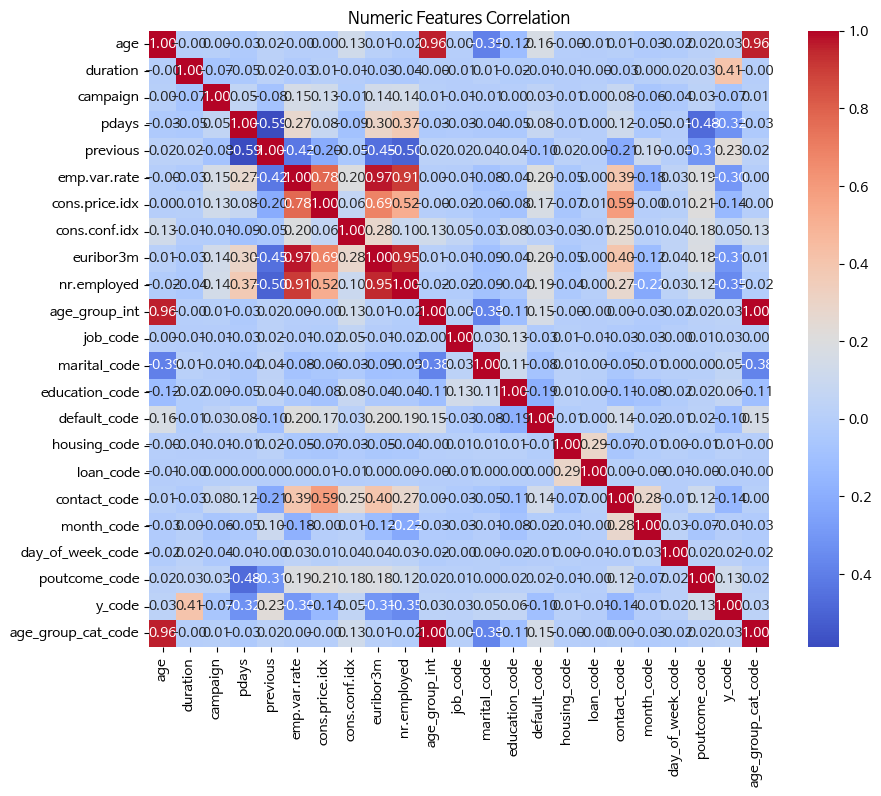

In [51]:
show_plot_correlation_matrix(df_full)

<Figure size 1400x600 with 0 Axes>

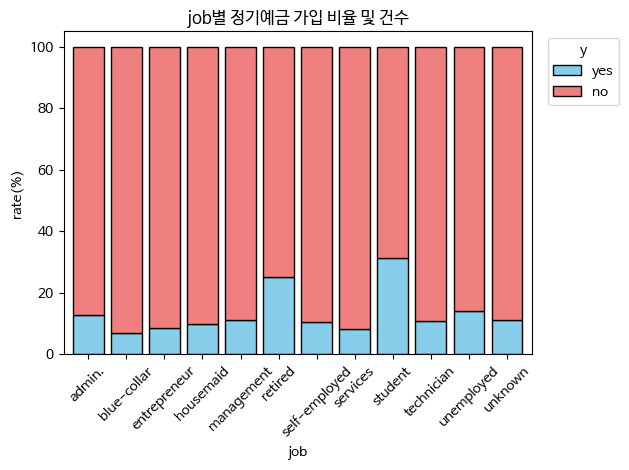

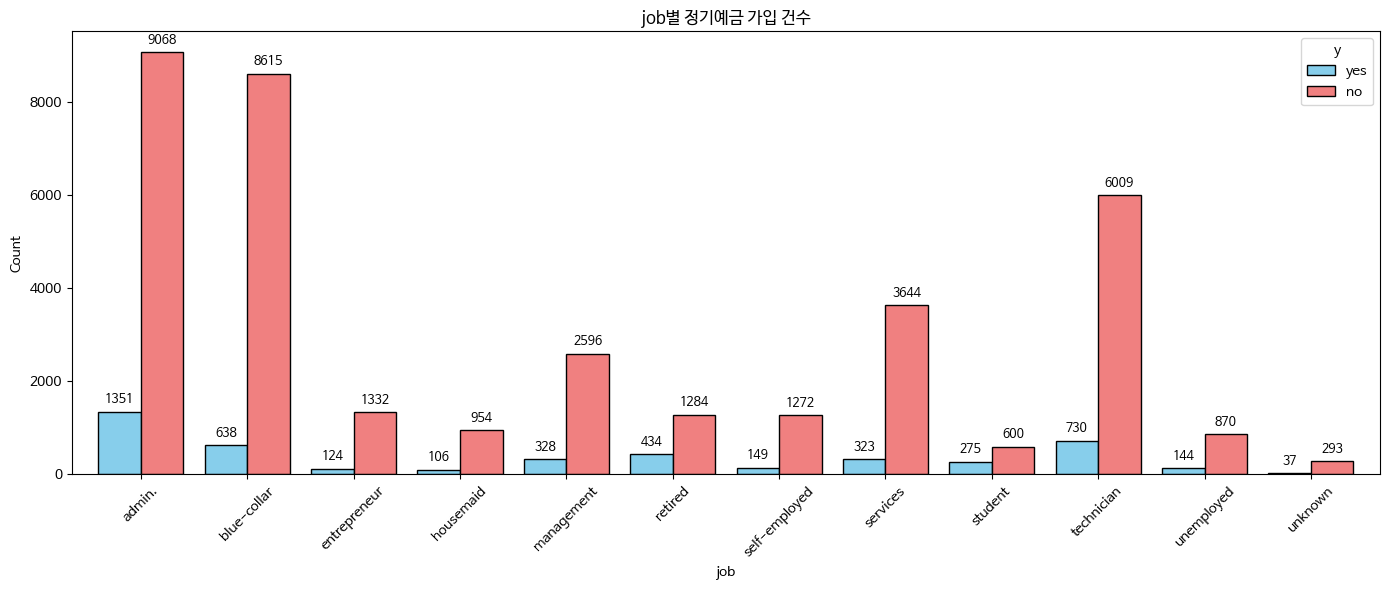

<Figure size 1400x600 with 0 Axes>

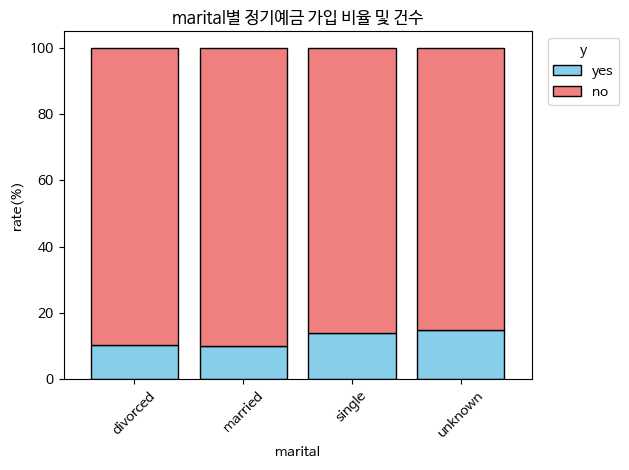

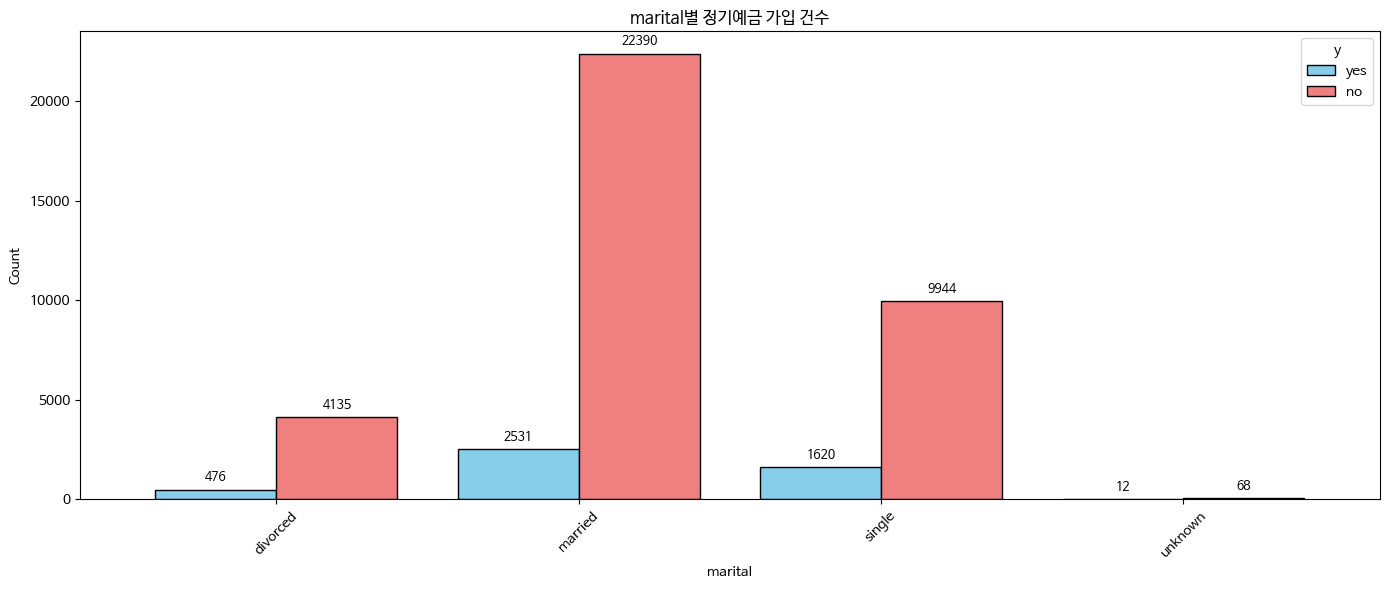

<Figure size 1400x600 with 0 Axes>

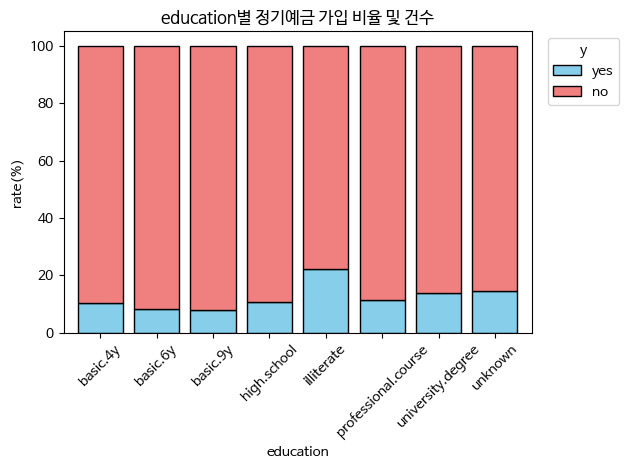

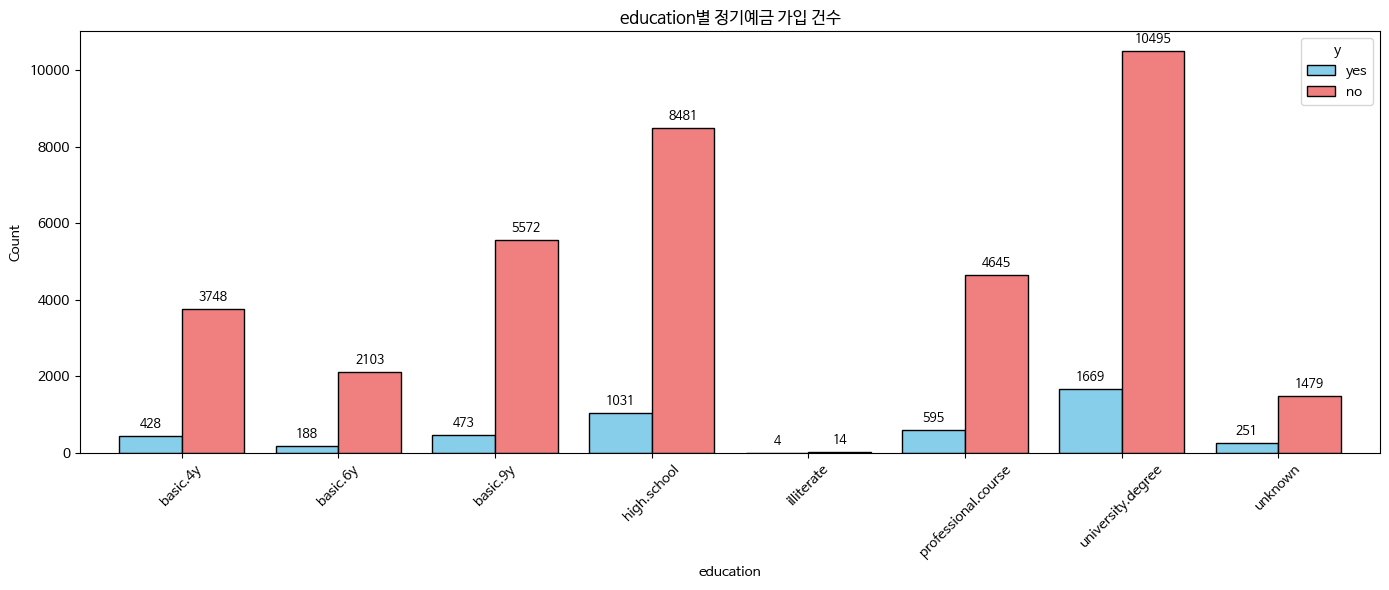

<Figure size 1400x600 with 0 Axes>

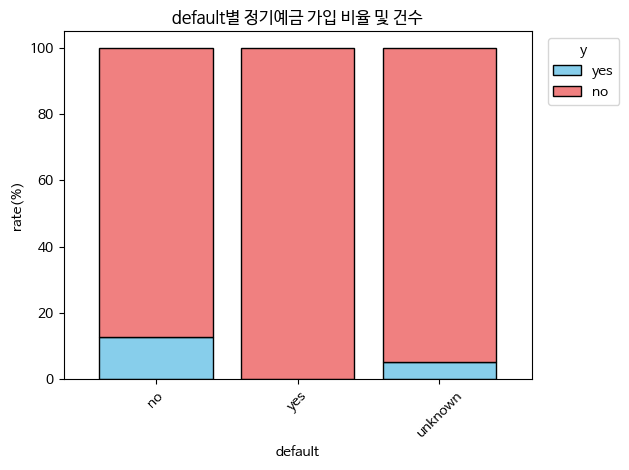

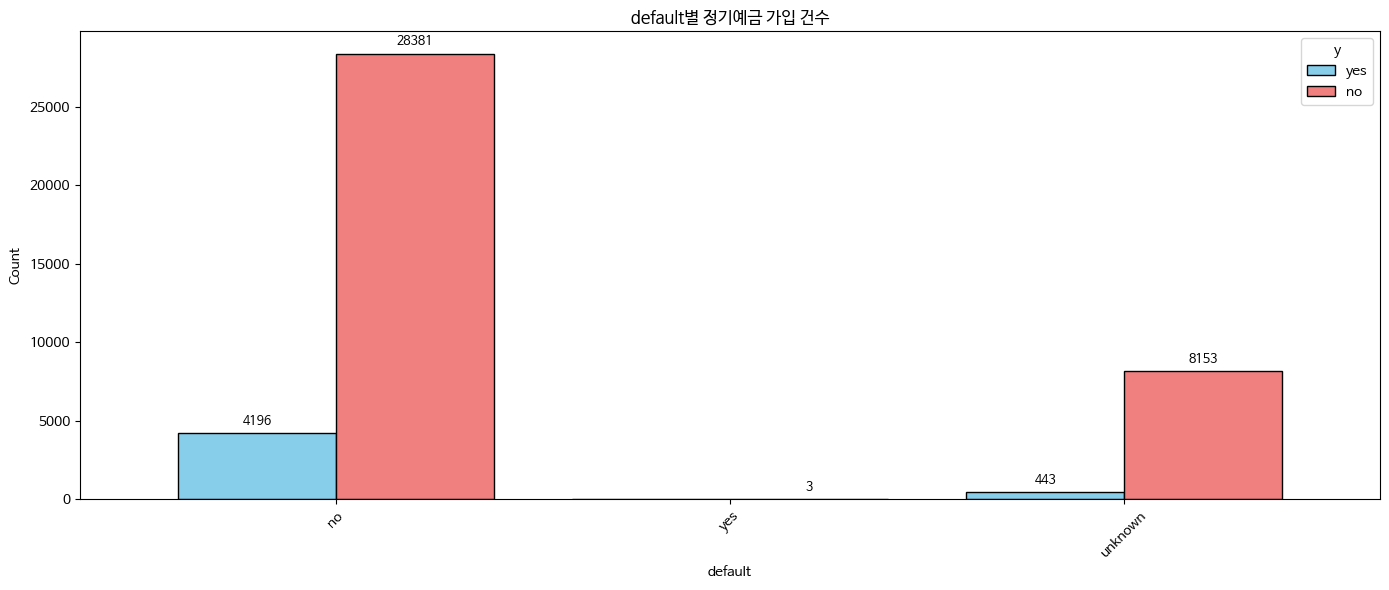

<Figure size 1400x600 with 0 Axes>

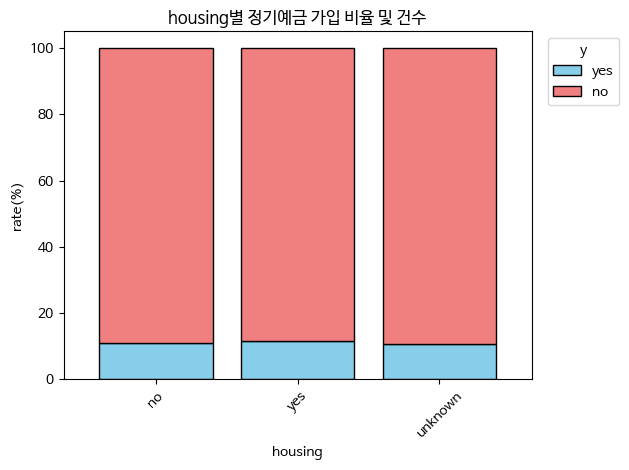

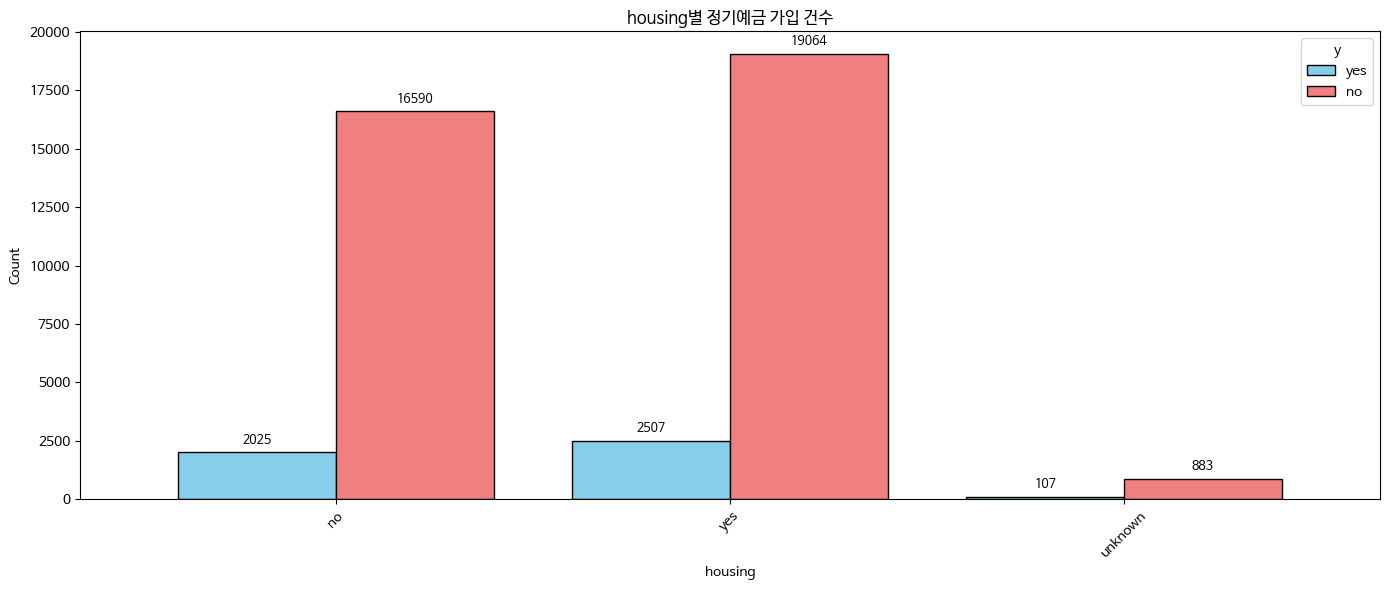

<Figure size 1400x600 with 0 Axes>

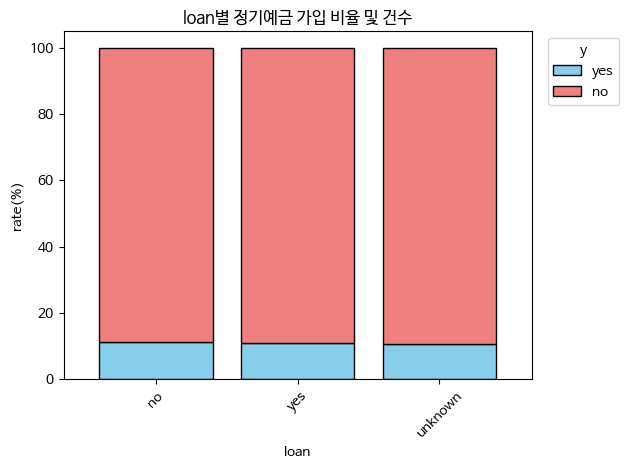

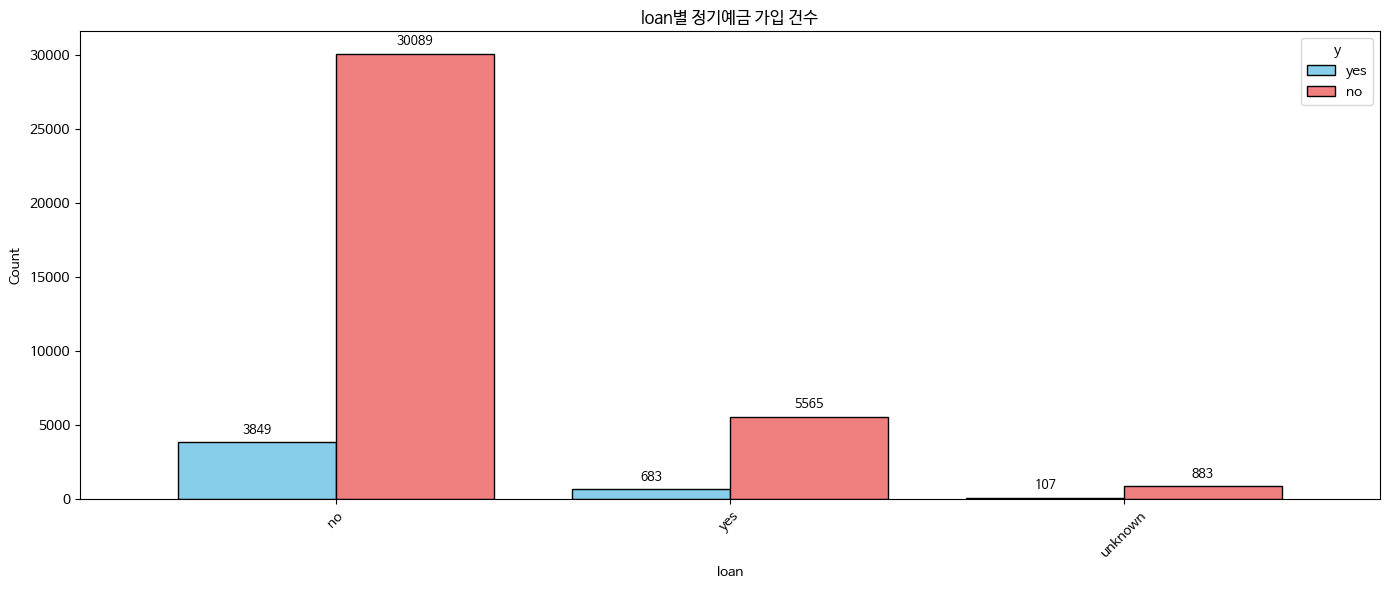

<Figure size 1400x600 with 0 Axes>

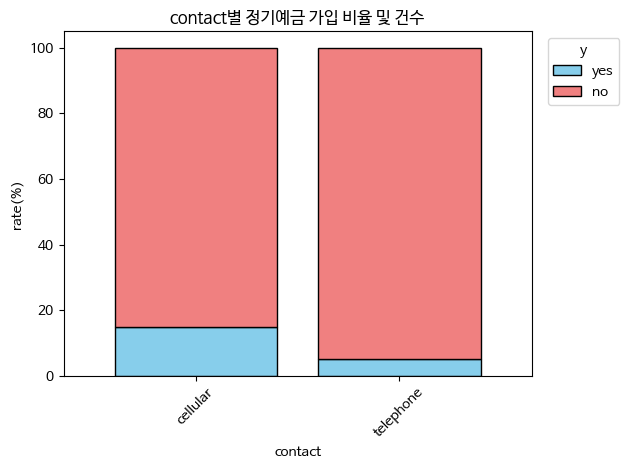

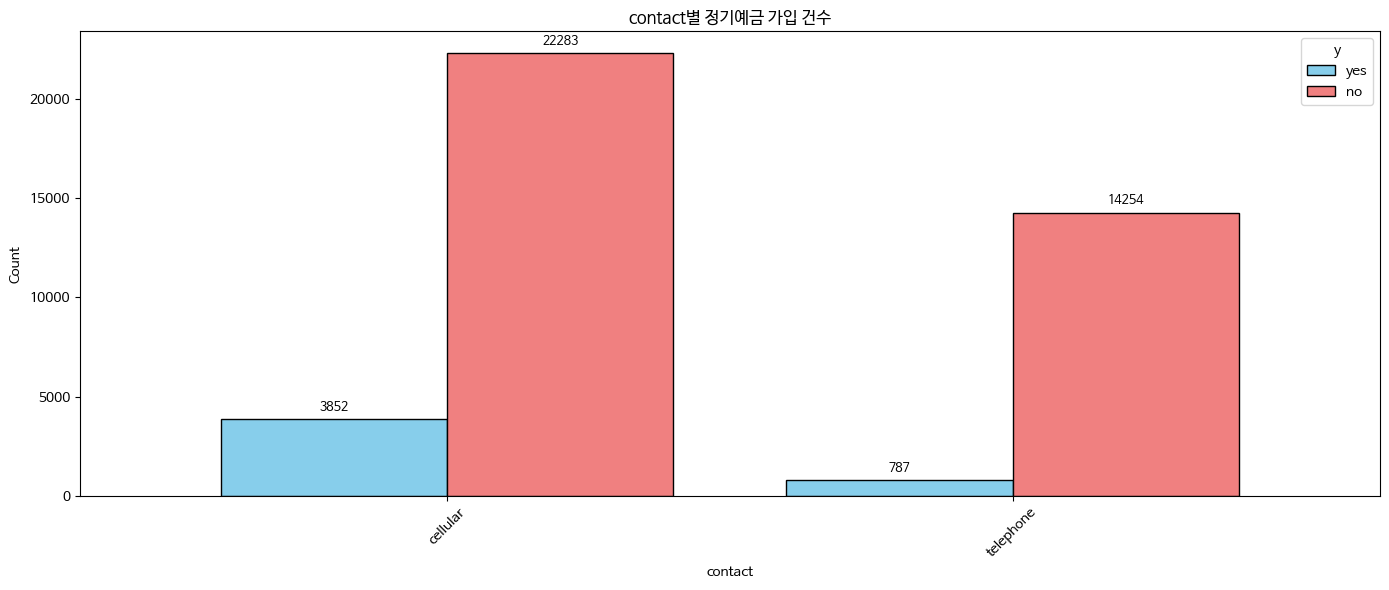

<Figure size 1400x600 with 0 Axes>

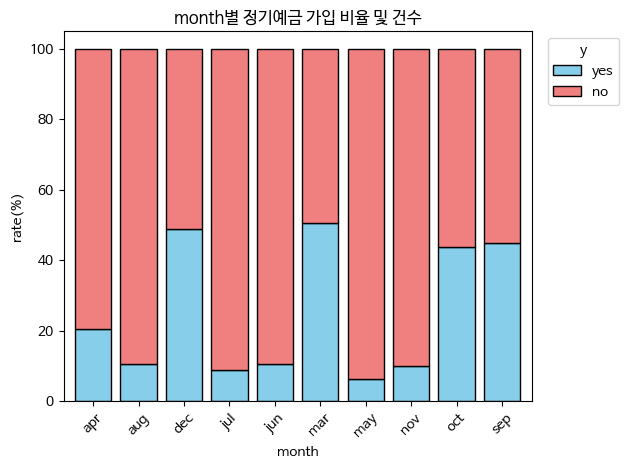

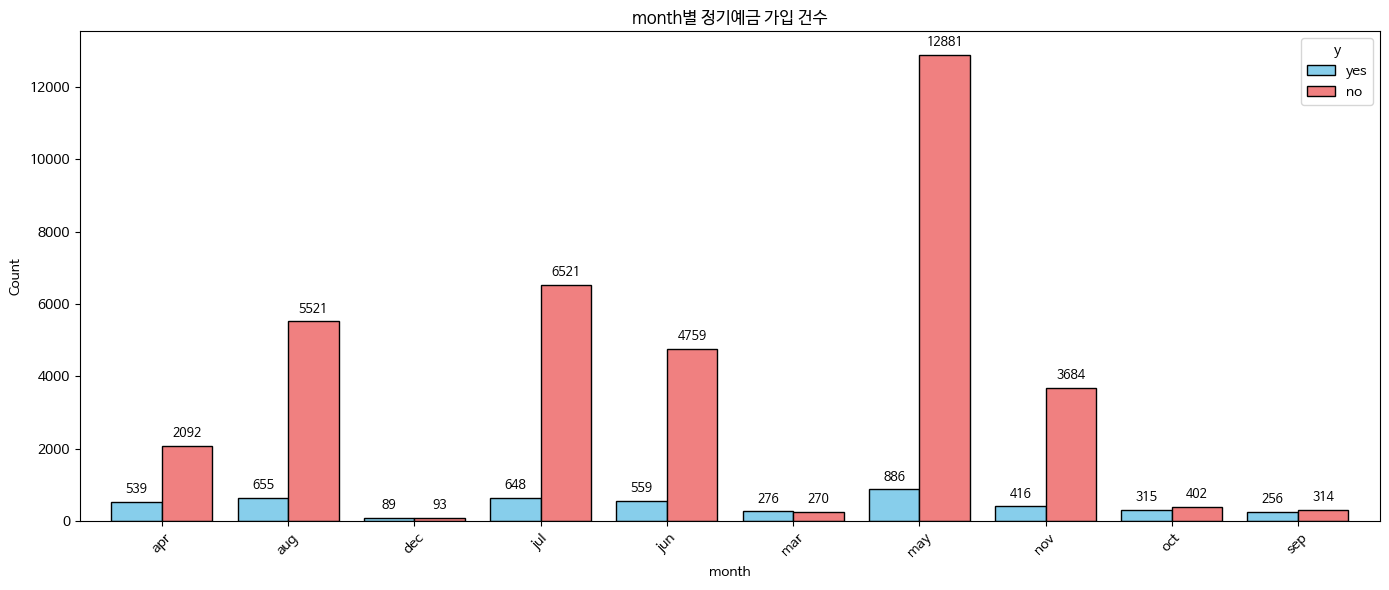

<Figure size 1400x600 with 0 Axes>

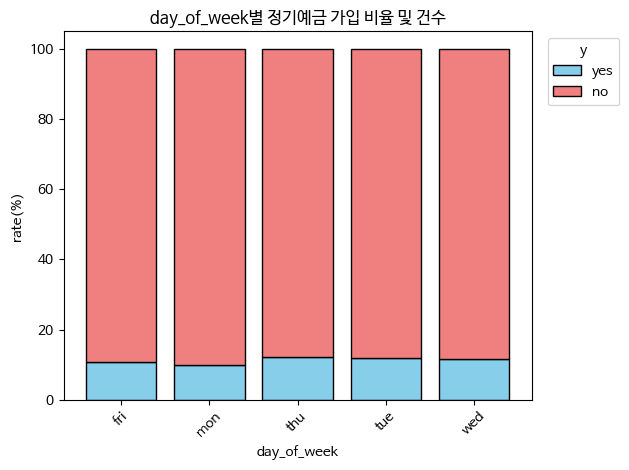

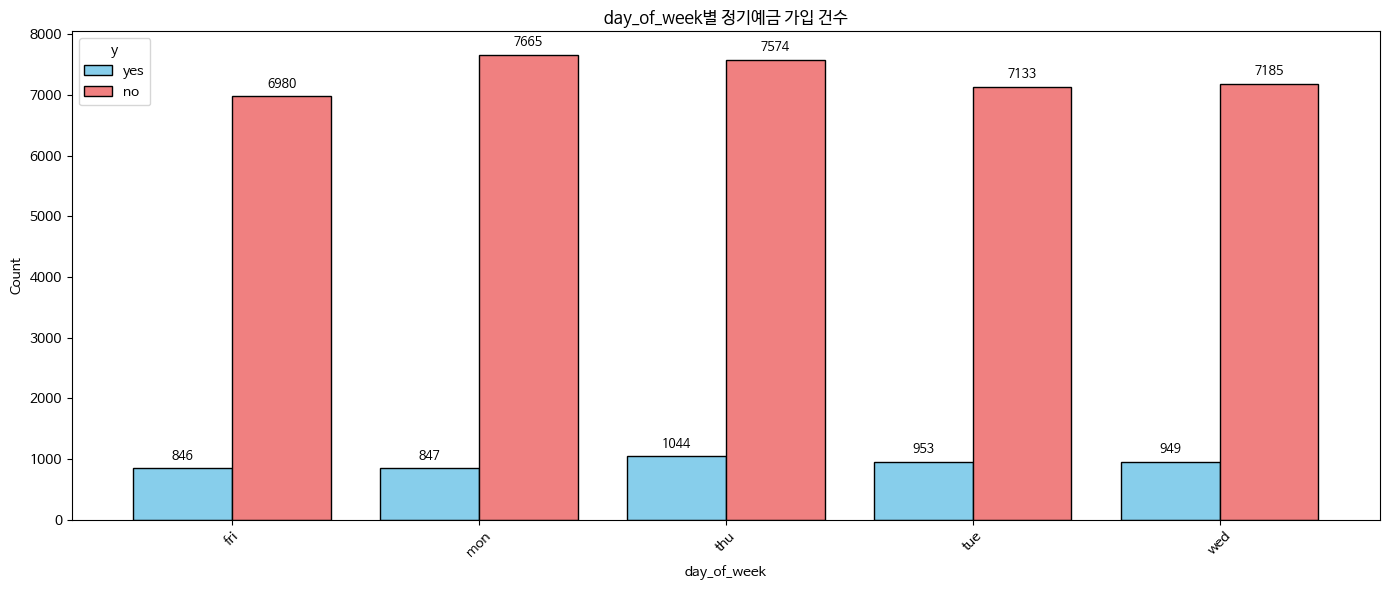

<Figure size 1400x600 with 0 Axes>

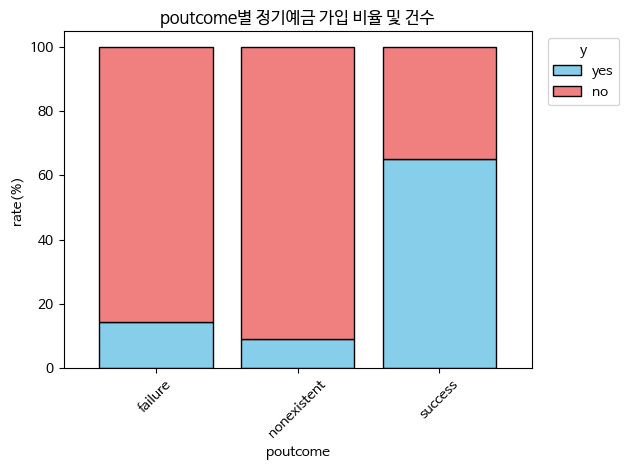

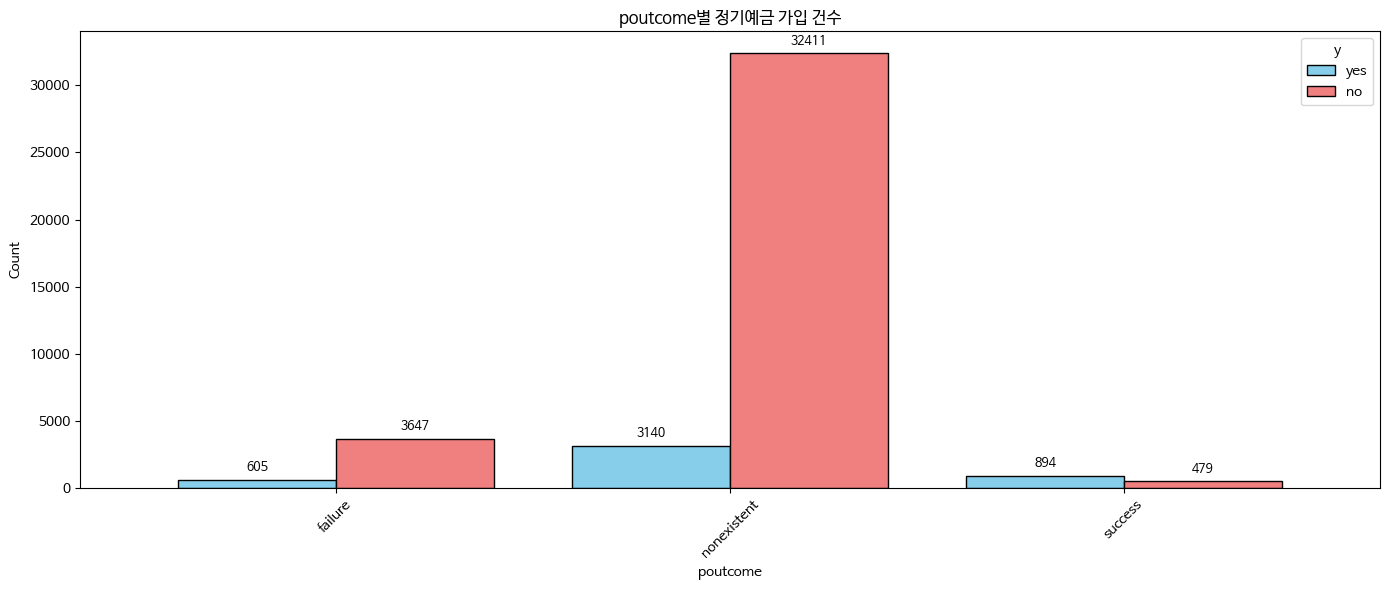

<Figure size 1400x600 with 0 Axes>

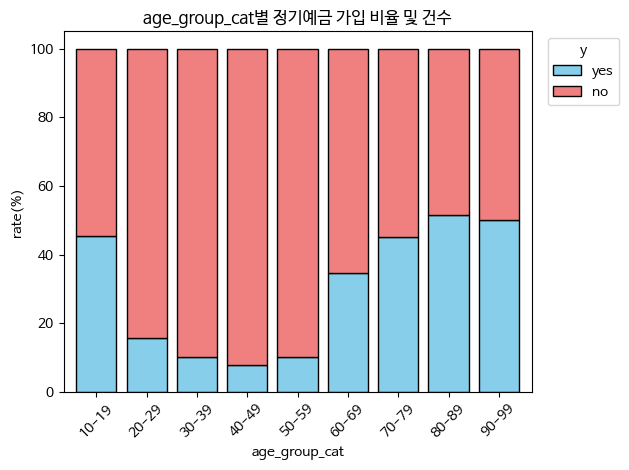

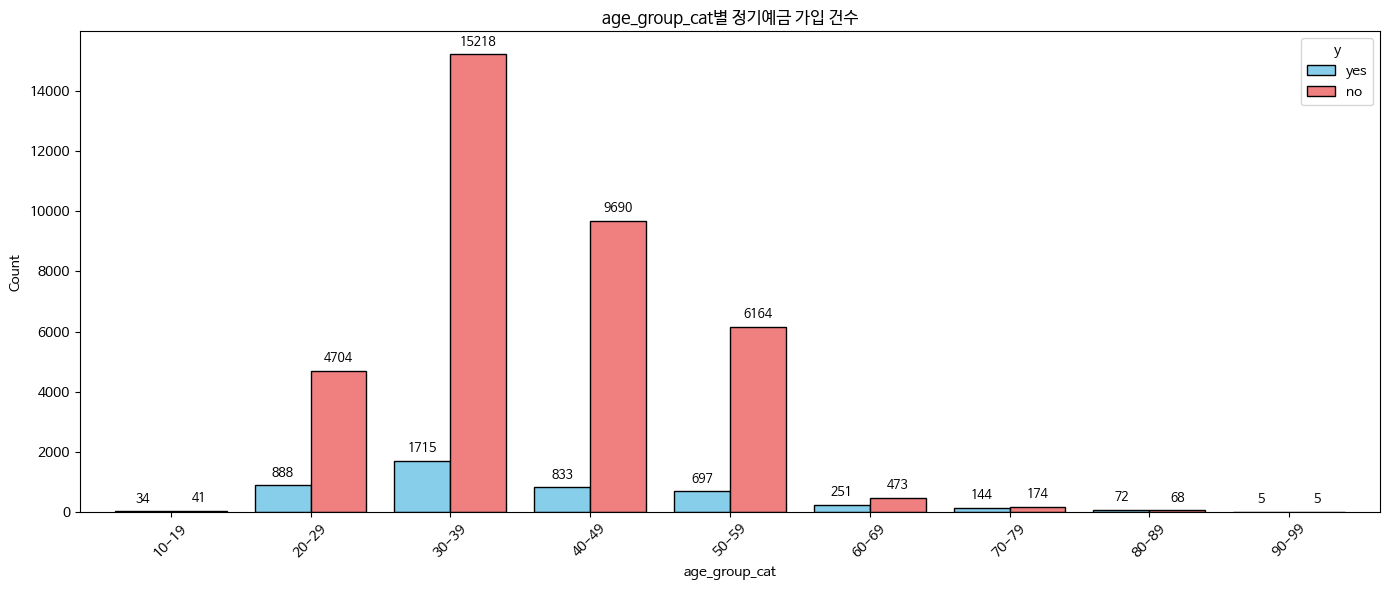

In [52]:
cat_cols = df_full.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'y']

for col in cat_cols:
    title = f"{col}별 정기예금 가입 비율 및 건수"
    title2 = f"{col}별 정기예금 가입 건수"
    show_plot_crosstab_stack(df_full, col, 'y', title=title)
    plot_yes_no_grouped(df_full, col, 'y', title=title2)

<Figure size 1400x600 with 0 Axes>

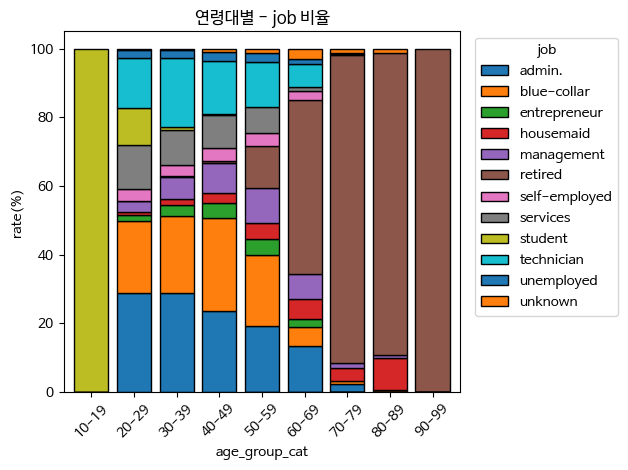

<Figure size 1400x600 with 0 Axes>

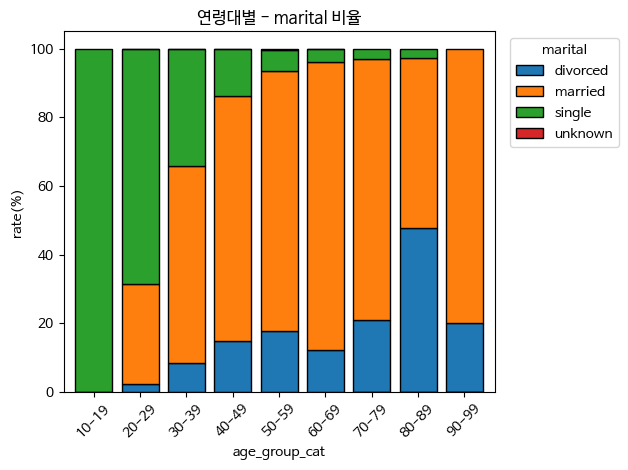

<Figure size 1400x600 with 0 Axes>

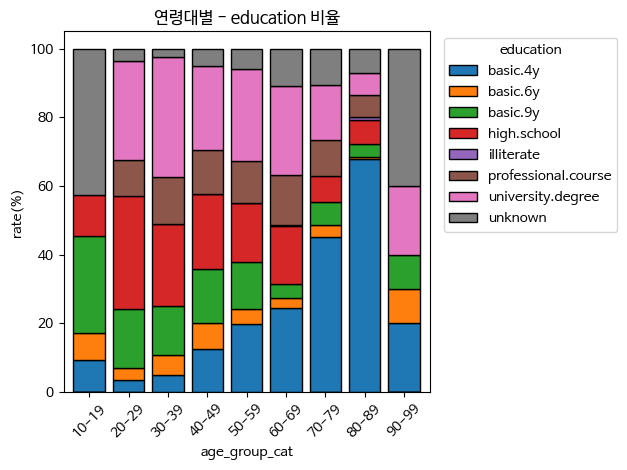

<Figure size 1400x600 with 0 Axes>

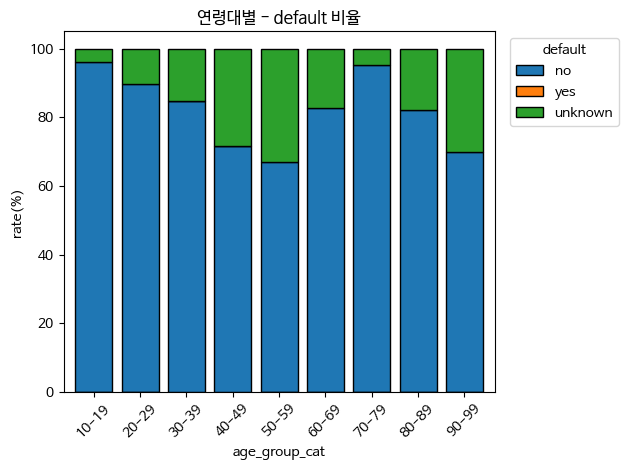

<Figure size 1400x600 with 0 Axes>

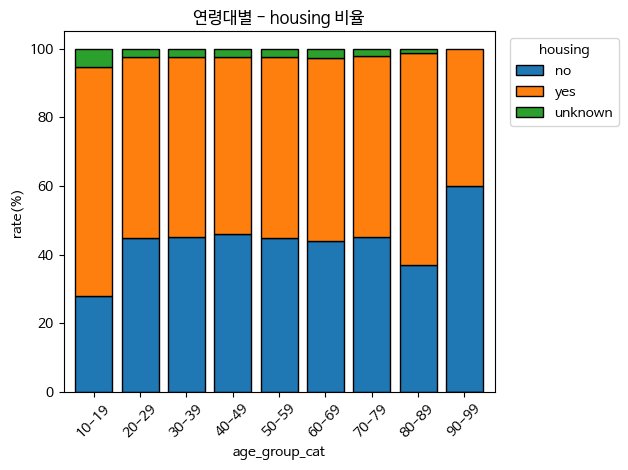

<Figure size 1400x600 with 0 Axes>

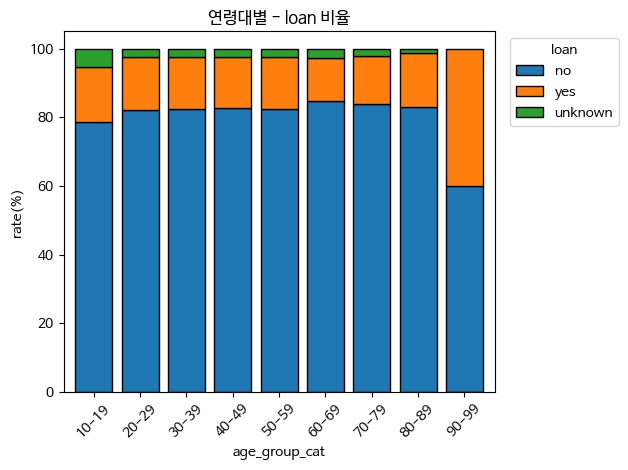

<Figure size 1400x600 with 0 Axes>

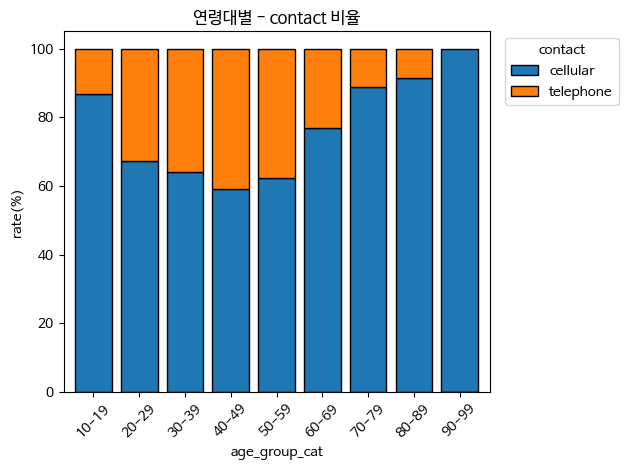

<Figure size 1400x600 with 0 Axes>

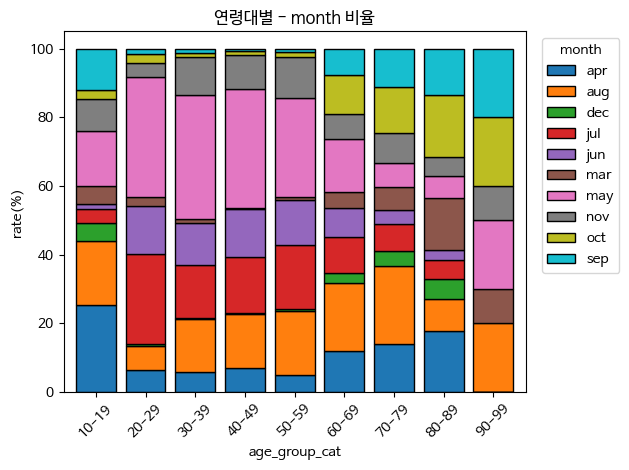

<Figure size 1400x600 with 0 Axes>

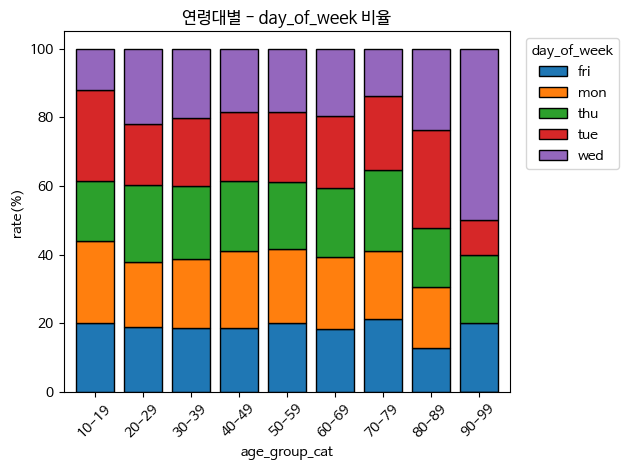

<Figure size 1400x600 with 0 Axes>

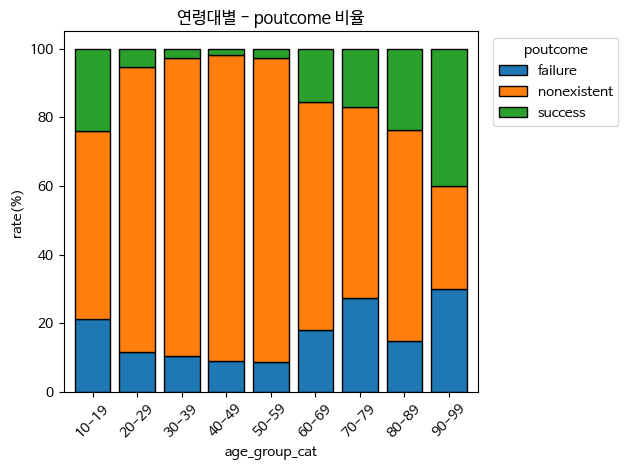

<Figure size 1400x600 with 0 Axes>

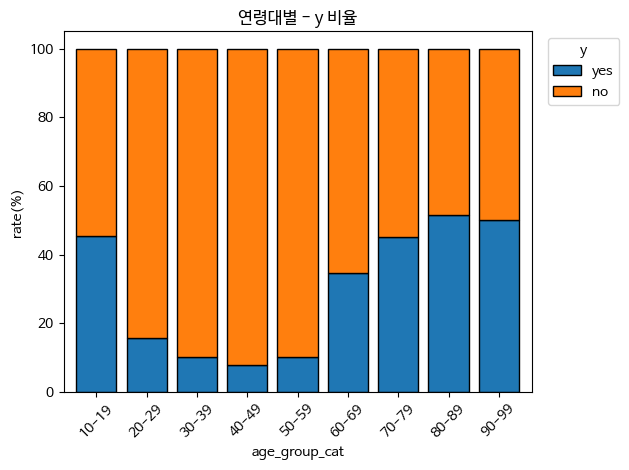

In [104]:
cat_cols = df_full.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if (c != 'age_group_cat')]

for col in cat_cols:
    title = f"연령대별 - {col} 비율"
    show_plot_crosstab_stack(df_full, 'age_group_cat', col, title)

고객 특성별 - 나이

 - 10대와 60대 이상의 고령층에서 높은 가입률을 보임.
 - 30대와 40대는 가입 고객 수는 많지만, 가입률은 평균 수준임.

▶︎ 생애 주기 연령별 마켓팅이 필요함.


고객 특성별 - 직업
- 가입 비율
     - 높은 직업군 : 학생과 은퇴자 직업군
     - 낮은 직업군 : blue-color 직업군

- 가입자 수
     - 높은 직업군 : admin., technician 직업군

▶︎ 직업군별 생활패턴 등 직업군도 영향을 미침


고객 특성별 - 결혼 여부

 - 미혼 고객이 상대적 높은 가입류

    ▶︎ 미혼고객은 자유로운 자산 운용, 저축 우선순위 높음.

 - 기혼 고객은 가입 건수는 많으나, 비율 낮음.

    ▶︎ 가계 지출 부담, 다양한 재정 책임.

▶︎ 라이프스타일 맞춤형, 우선순위 고려한 접근


고객 특성별 - 교육 수준

- 가입 비율
 - 고학력군에서 상대적 높은 비율.
 - 문맹군은 비율은 높으나 모수가 적음.

▶︎ 학력에 따라 금융 상품의 이해도에 영향을 줌.

▶︎ 맞춤형 상품 설명과 고육자료 제공이 필요


고객 특성별 - 신용 불량
 - 신용 불량이 아닌 고객들의 가입 비율이 압도적으로 높음.
 - 금융 상품 가입은 신용 상태가 양호할 때 가능.
 - 신용 관리 교육과 연계한 마케팅 전략이 효과적일 수 있음.


마케팅 - 연락(월)
- 특정 월(3, 9, 10, 12월)에 상대적으로 높은 가입율을 보임.

▶︎ 계절적 프로모션 등 고객 심리 파악 필요


마케팅 - 이전 캠페인 결과

- 이전 캠페인에서 성공한 고객군의 가입 비율이 압도적으로 높음.

▶︎ 긍정적 관계가 맺어진 고객은 이어질 확률이 높음. 이탈방지대책 강구


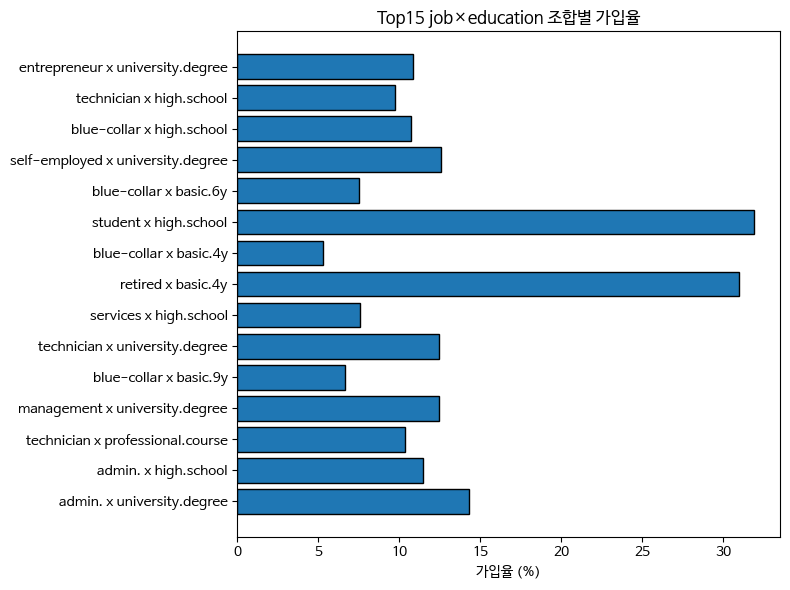

In [55]:
# yes 건수와 전체 건수 집계
stats = (
    df_full
    .groupby(['job_code','education_code'])['y_code']
    .agg(count_yes='sum', total='count')
    .reset_index()
)
stats['pct_yes'] = stats['count_yes'] / stats['total'] * 100

# top15 yes 건수 기준 추출
top15 = stats.nlargest(15, 'count_yes')

# 문자열 레이블 매핑
job_map = mappings['job']
edu_map = mappings['education']
top15['label'] = top15.apply(
    lambda r: f"{job_map[r.job_code]} x {edu_map[r.education_code]}",
    axis=1
)

plt.figure(figsize=(8,6))
plt.barh(top15['label'], top15['pct_yes'], edgecolor='black')
plt.xlabel('가입율 (%)')
plt.title('Top15 job×education 조합별 가입율')
plt.tight_layout()
plt.show()

고객 특성별 - 직업과 교육 수준

- student x high school

    ▶︎ 높은 저축 의지와 금융 교육 효과로 높은 가입률 보임

- retried x basic 4y

    ▶︎ 노후 대비 자금 관리 필요성으로 예금 상품 선호도 높음

- admin x university degree

    ▶︎ 금융 지식과 안정적 수입으로 계획적 자산 관리 경향


▶︎ 교육 수준과 직업이 결합된 세그먼트별 마케팅 접근이 효과적


In [56]:
counts = pd.crosstab(
    index=[df_full['job_code'], df_full['education_code']],
    columns=df_full['y']
)

rates = counts.div(counts.sum(axis=1), axis=0).multiply(100).round(1)

summary = pd.concat([counts, rates], axis=1, keys=['Count','Rate'])

job_map = mappings['job']
edu_map = mappings['education']
summary.index = summary.index.map(
    lambda jc_ec: f"{job_map[jc_ec[0]]} x {edu_map[jc_ec[1]]}"
)

rows = ['student x high.school','technician x university.degree']
print(summary.loc[rows])

                               Count       Rate      
y                                 no  yes    no   yes
student x high.school            243  114  68.1  31.9
technician x university.degree  1584  225  87.6  12.4


In [57]:
import pandas as pd
from itertools import combinations

cat_cols = df_full.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'y']

records = []
for col1, col2 in combinations(cat_cols, 2):
    code1, code2 = f'{col1}_code', f'{col2}_code'

    stats = (
        df_full
        .groupby([code1, code2])['y_code']
        .agg(count_yes='sum', total='count')
        .reset_index()
    )
    stats['count_no']  = stats['total'] - stats['count_yes']
    stats['pct_yes']   = (stats['count_yes'] / stats['total'] * 100).round(2)

    stats['combination'] = stats.apply(
        lambda r: f"{mappings[col1][r[code1]]} x {mappings[col2][r[code2]]}",
        axis=1
    )
    stats['col1'] = col1
    stats['col2'] = col2

    records.append(stats[['col1','col2','combination','count_yes','count_no','total','pct_yes']])

all_combos = pd.concat(records, ignore_index=True)

In [58]:
# yes 건수 상위 15개 추출
top15 = all_combos.nlargest(15, 'count_yes')

pd.set_option('display.max_rows', 15)

In [59]:
top15

,col1,col2,combination,count_yes,count_no,total,pct_yes
1017,default,contact,no x cellular,3561,18208,21769,16.36
1010,default,loan,no x no,3477,23361,26838,12.96
1174,loan,contact,no x cellular,3189,18324,21513,14.82
1056,default,poutcome,no x nonexistent,2757,24771,27528,10.02
1226,loan,poutcome,no x nonexistent,2609,26695,29304,8.90
1291,contact,poutcome,cellular x nonexistent,2453,18460,20913,11.73
1003,default,housing,no x yes,2282,14924,17206,13.26
582,marital,default,married x no,2218,16431,18649,11.89
1090,housing,contact,yes x cellular,2130,12397,14527,14.66
1085,housing,loan,yes x no,2098,15782,17880,11.73


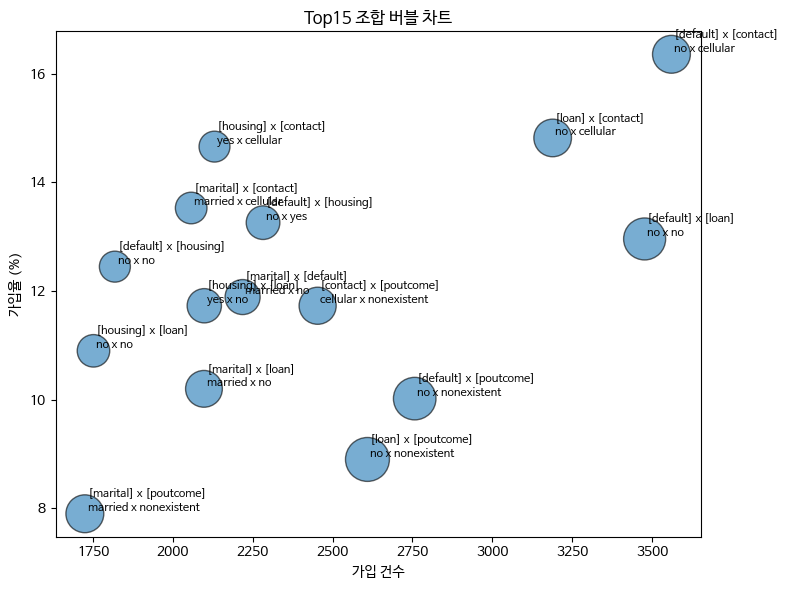

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
sizes = top15['total'] / top15['total'].max() * 1000

scatter = ax.scatter(
    top15['count_yes'],
    top15['pct_yes'],
    s=sizes,
    alpha=0.6,
    edgecolor='black'
)

for _, row in top15.iterrows():
    label = f"[{row['col1']}] x [{row['col2']}]\n{row['combination']}"
    ax.annotate(
        label,
        (row['count_yes'], row['pct_yes']),
        textcoords="offset points",
        xytext=(2,2),
        fontsize=8
    )

ax.set_xlabel('가입 건수')
ax.set_ylabel('가입율 (%)')
ax.set_title('Top15 조합 버블 차트')
plt.tight_layout()
plt.show()

변수 조합 Top 15

- 신용 상태 확인

    ▶︎ 신용 양호 고객이 예금 가입률 높음.

- 대출 현황 파악

    ▶︎ 개인 대출이 없는 고객군이 예금 가입에 적극적임.

- 연락 방식 최적화

    ▶︎ 모바일(cellular) 연락 방식이 효과적임.


▶︎ 각 변수의 복합적 조합을 통해 세밀한 맞춤 타겟군 형성 가능


In [61]:
df_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_unknown_flag,housing_code,loan_unknown_flag,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,age_group_cat_code
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.024043,0.571959,0.024043,0.199825,0.365286,4.231033,2.004614,0.930081,0.112663,3.551462
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.153185,0.541216,0.153185,0.456055,0.481516,2.319973,1.397692,0.362937,0.316184,1.066131
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,3.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,3.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,3.000000,1.000000,0.000000,4.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,1.000000,2.000000,1.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000,9.000000


In [62]:
df_full.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,housing_unknown_flag,housing_code,loan_unknown_flag,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,age_group_cat_code
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024043,0.571959,0.024043,0.199825,0.365286,4.231033,2.004614,0.930081,0.112663,3.551462
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.153185,0.541216,0.153185,0.456055,0.481516,2.319973,1.397692,0.362937,0.316184,1.066131
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,3.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,3.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,3.000000,1.000000,0.000000,4.000000


In [63]:
show_table_grouped_stats(df_full, 'age_group_cat', ['duration','campaign'])

duration                        campaign                   
                 count    mean median     std    count  mean median   std
age_group_cat                                                            
0-9                  0     NaN    NaN     NaN        0   NaN    NaN   NaN
10-19               75  300.17  236.0  222.65       75  1.92    2.0  1.17
20-29             5592  266.17  187.0  264.78     5592  2.47    2.0  2.57
30-39            16933  256.37  178.0  260.54    16933  2.56    2.0  2.76
40-49            10523  255.17  178.0  255.87    10523  2.60    2.0  2.80
50-59             6861  258.30  176.0  260.96     6861  2.69    2.0  3.03
60-69              724  274.51  201.0  239.95      724  2.18    2.0  1.94
70-79              318  275.07  210.5  246.03      318  1.95    1.0  1.76
80-89              140  261.67  195.5  183.92      140  1.96    1.0  1.42
90-99               10  413.70  321.0  311.10       10  1.40    1.0  0.70
100+                 0     NaN    NaN     NaN        0   NaN    NaN   NaN

___

In [64]:
df_full['has_prev_contact'] = (df_full['pdays'] != 999).astype(int)
df_full['pdays_clean'] = df_full['pdays'].replace(999, np.nan)

상관관계 인사이트

1. 특정 고객 세그먼트
 - 직업/나이/교육수준/연락유형/이전 마케팅 성공 여부 등 특정 고객군에서 상대적으로 높은 가입률
 -  정밀 타겟 마케팅 필요
2. 마케팅 시점
 - 월 별 가입률, 연락 유형 등 마케팅 시점에 따라 가입률이 다름
 - 최적/효과적인 마케팅 시기 및 채널 확보 필요
3. 사회경제
 - 경제 지표는 가입 결정에 매우 영향을 미침
 - 시장 상황 예의 주시
4. 타겟 변수 y
 - 심각한 불균형 상태


# 결정 트리

In [65]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     41176 non-null  int64   
 1   job                     41176 non-null  category
 2   marital                 41176 non-null  category
 3   education               41176 non-null  category
 4   default                 41176 non-null  category
 5   housing                 41176 non-null  category
 6   loan                    41176 non-null  category
 7   contact                 41176 non-null  category
 8   month                   41176 non-null  category
 9   day_of_week             41176 non-null  category
 10  duration                41176 non-null  int64   
 11  campaign                41176 non-null  int64   
 12  pdays                   41176 non-null  int64   
 13  previous                41176 non-null  int64   
 14  poutcome                411

### 1) 데이터 준비

In [66]:
from sklearn.model_selection import train_test_split # train, test 분리하는 코드
from sklearn.tree import DecisionTreeRegressor # 결정트리 - 회귀문제
from sklearn.tree import DecisionTreeClassifier # 결정트리 - 분류문제
from sklearn.metrics import mean_squared_error # 회귀문제에서 불순도 최소화하는

In [86]:
y_clf = df_full['y_code']

cat_cols = df_full.select_dtypes(include=['category']).columns.tolist()
#X_clf = df_full.drop(columns=cat_cols + ['y', 'y_code', 'pdays', 'pdays_clean', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])
#X_clf = df_full.drop(columns=cat_cols + ['y', 'y_code', 'pdays', 'pdays_clean', 'duration', 'nr.employed'])
X_clf = df_full.drop(columns=cat_cols + ['y', 'y_code', 'pdays', 'pdays_clean'])

X_clf = X_clf.select_dtypes(include=['number'])

In [87]:
print("X_clf columns:", X_clf.columns.tolist())
print("X_clf shape:", X_clf.shape)

X_clf columns: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'age_group_int', 'job_unknown_flag', 'job_code', 'marital_unknown_flag', 'marital_code', 'education_unknown_flag', 'education_code', 'default_unknown_flag', 'default_code', 'housing_unknown_flag', 'housing_code', 'loan_unknown_flag', 'loan_code', 'contact_code', 'month_code', 'day_of_week_code', 'poutcome_code', 'age_group_cat_code', 'has_prev_contact']
X_clf shape: (41176, 28)


### 2) Train / Test split

In [88]:
# 학습 데이터 / 테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

### 3) 모델

In [89]:
# 모델링
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_clf, y_clf)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [90]:
y_pred = dt_clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("평균 제곱 오차(MSE): ", mse)

평균 제곱 오차(MSE):  0.09482758620689655


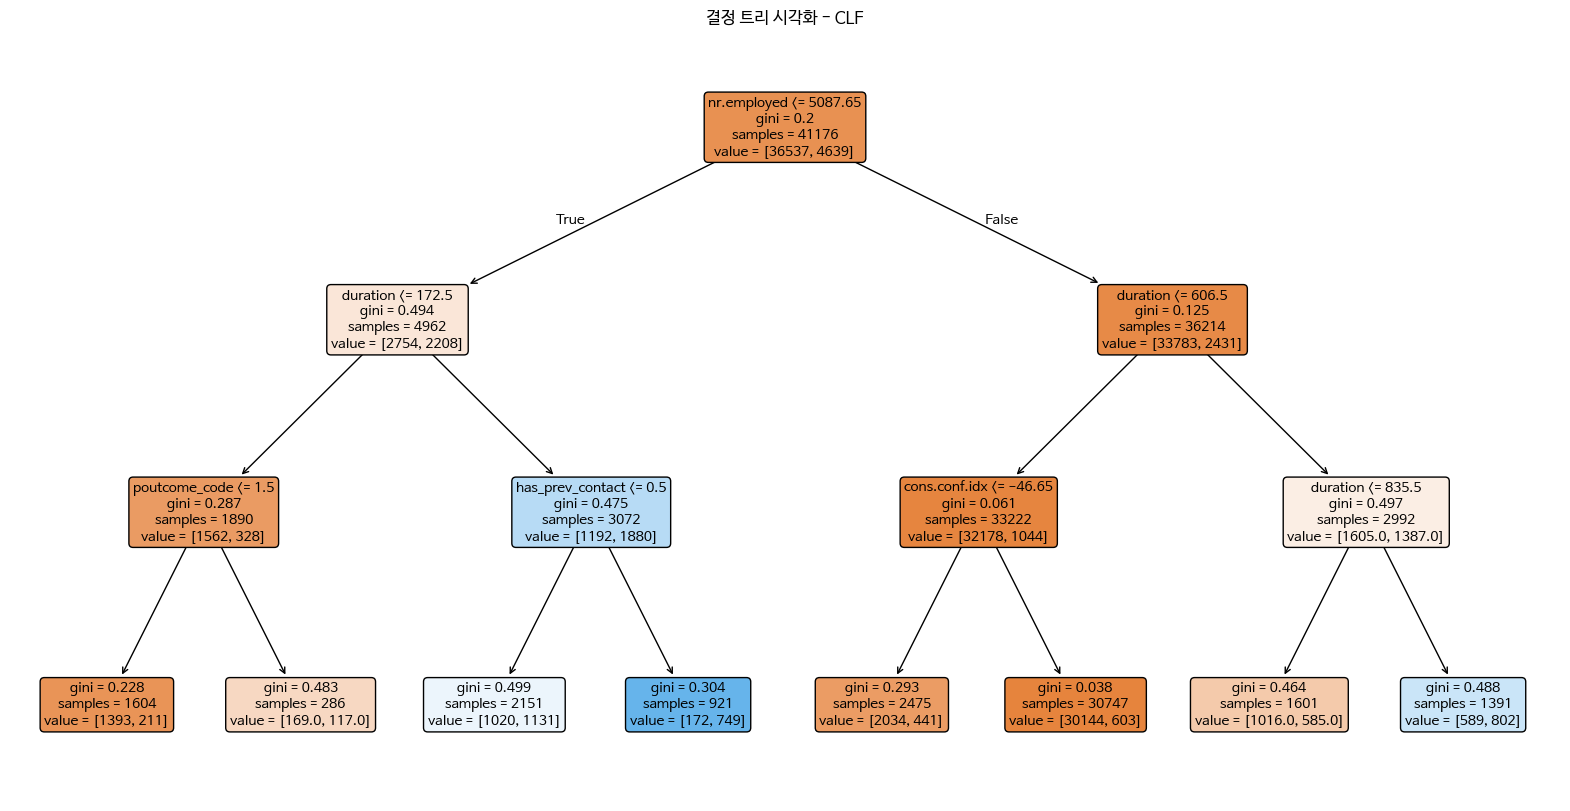

In [91]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_clf,
          feature_names=X_clf.columns,
          filled=True,
          rounded=True,
          max_depth=10,
          fontsize=10)

plt.title("결정 트리 시각화 - CLF")
plt.show()

### 4) 학습/평가

#### (1) 결정트리

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons                 # 데이터셋
from sklearn.model_selection import train_test_split    # 데이터스플릿
from sklearn.tree import DecisionTreeClassifier         # 디시전트리
from sklearn.ensemble import RandomForestClassifier     # 랜덤포레스트
from sklearn.metrics import accuracy_score              # 정확도
from matplotlib.colors import ListedColormap            # 결정경계 시각화

In [93]:
accuracy_dt = accuracy_score(y_test, y_pred)
print("단일 결정 트리 정확도: ", accuracy_dt)

단일 결정 트리 정확도:  0.9051724137931034


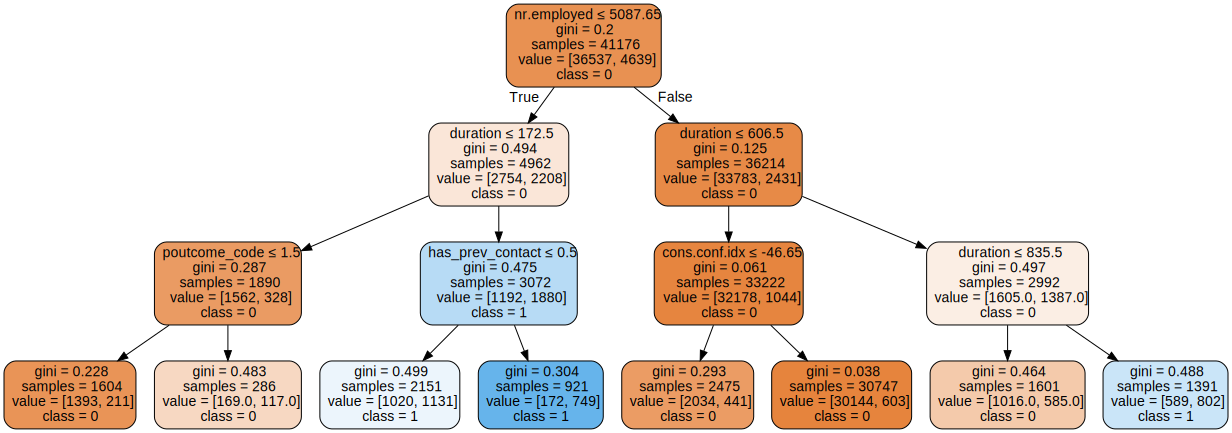

In [94]:
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz .dot 포맷으로 트리 구조 저장
dot_data = export_graphviz(
    dt_clf,
    out_file = None,
    feature_names=X_clf.columns,
    class_names=[str(c) for c in dt_clf.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# graphviz로 랜더링
graph = graphviz.Source(dot_data)

graph

#### (2) 랜덤 포레스트

In [95]:
# 랜덤 포레스트 모델 학습

rf_clf = RandomForestClassifier(max_depth=5, n_estimators=100, n_jobs=-1)   # n_jobs=-1 : 모든 코어 사용하겠다는 뜻
                                                                            # n_estimators=100 : 나무의 갯수

rf_clf.fit(X_train, y_train)

# 모델 예상 - 테스트 데이터 예측
y_pred_rf = rf_clf.predict(X_test)

# 정확도 계산
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("랜덤 포레스트 정확도 계산: ", accuracy_rf)

랜덤 포레스트 정확도 계산:  0.8998300145701797


In [96]:
# 랜덤 포레스트 결과 시각화
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 예시: X_clf 에 수십 개 피처가 있다고 가정
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.4, random_state=42)

# n_estimators, max_depth 등 원하는 하이퍼파라미터 설정
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

# 학습
rf_clf.fit(X_train, y_train)

# 예측 & 평가
y_pred = rf_clf.predict(X_test)
print("RF 정확도:", accuracy_score(y_test, y_pred))

# 피처 중요도
import pandas as pd
feat_imp = pd.Series(rf_clf.feature_importances_, index=X_clf.columns)
print(feat_imp.sort_values(ascending=False).head(10))

RF 정확도: 0.9062594863699837
duration            0.366332
euribor3m           0.152139
nr.employed         0.120035
has_prev_contact    0.067623
poutcome_code       0.053395
cons.conf.idx       0.048670
cons.price.idx      0.044363
emp.var.rate        0.038125
month_code          0.020411
age                 0.015301
dtype: float64


#### (3) 앙상블

In [97]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from matplotlib.colors import ListedColormap
from lightgbm import LGBMClassifier # LightGBM
from xgboost import XGBClassifier   #XGBoost

In [98]:
# 모델별 정확도 저장 딕셔너리
accuracies = {}
precisions = {}
recalls = {}

# ----------- 스태킹 -----------
# 4-1. 베이스 모델들
estimators =[
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('adb', AdaBoostClassifier(
                                n_estimators= 50,
                                learning_rate= 1.0)),
    ('rdb', RandomForestClassifier(
                                n_estimators=100,
                                max_depth=7,
                                random_state=42,
                                n_jobs=-1)),
    ('lgb', LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           max_depth=7,
                           random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=6,
                          scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),  # 불균형 보정
                          random_state=42,
                          n_jobs=-1)),
    ('gb', GradientBoostingClassifier(
                        n_estimators=100,   # 약한 학습기(트리)의 개수
                        learning_rate=0.1,  # 학습률: 각 트리가 기여하는 정도
                        max_depth=3,        # 각 약한 학습기(트리)의 최대 깊이
                        random_state=42))
]

# 4-2. 메타 모델 (최종 예측 모델)
# cv: 교차 검증 폴드 수 (메타 모델 학습 시 과적합 방지)
# stack_method: 베이스 모델의 예측을 어떻게 메타 모델에 전달할지 (predict_proba 또는 predict)
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42),    # 최종 메타 모델
    cv=5,   # 교차 검증 폴드 수 (베이스 모델 훈련 시)
    n_jobs=-1
)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
accuracies["스태킹"] = accuracy_stacking
precision_stacking = precision_score(y_test, y_pred_stacking)
precisions["스태킹"] = precision_stacking
recall_stacking = recall_score(y_test, y_pred_stacking)
recalls["스태킹"] = recall_stacking

print("스태킹 분류기 정확도: ", accuracy_stacking)
print("스태킹 분류기 정밀도: ", precision_stacking)
print("스태킹 분류기 재현율: ", recall_stacking)
print(classification_report(y_test, y_pred_stacking, target_names=['no', 'yes'] ))

# ----------- 최종 정확도 -----------

print("\n--- 최종 앙상블 모델별 정확도 비교 ---")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")

print("\n--- 최종 앙상블 모델별 정밀도 비교 ---")
for model_name, prc in precisions.items():
    print(f"{model_name}: {prc:.4f}")

print("\n--- 최종 앙상블 모델별 재현율 비교 ---")
for model_name, rec in recalls.items():
    print(f"{model_name}: {rec:.4f}")

스태킹 분류기 정확도:  0.8652176552729038
스태킹 분류기 정밀도:  0.456215065211605
스태킹 분류기 재현율:  0.9063987308302486
              precision    recall  f1-score   support

          no       0.99      0.86      0.92     14580
         yes       0.46      0.91      0.61      1891

    accuracy                           0.87     16471
   macro avg       0.72      0.88      0.76     16471
weighted avg       0.93      0.87      0.88     16471


--- 최종 앙상블 모델별 정확도 비교 ---
스태킹: 0.8652

--- 최종 앙상블 모델별 정밀도 비교 ---
스태킹: 0.4562

--- 최종 앙상블 모델별 재현율 비교 ---
스태킹: 0.9064


In [99]:
# 1) 부스팅 모델들(베이스 학습기) 정의
estimators =[
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('adb', AdaBoostClassifier(
                                n_estimators= 50,
                                learning_rate= 1.0)),
    ('rdb', RandomForestClassifier(
                                n_estimators=100,
                                max_depth=7,
                                random_state=42,
                                n_jobs=-1)),
    ('lgb', LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           max_depth=7,
                           random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=6,
                          scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),  # 불균형 보정
                          random_state=42,
                          n_jobs=-1)),
    ('gb', GradientBoostingClassifier(
                        n_estimators=100,   # 약한 학습기(트리)의 개수
                        learning_rate=0.1,  # 학습률: 각 트리가 기여하는 정도
                        max_depth=3,        # 각 약한 학습기(트리)의 최대 깊이
                        random_state=42))
]

# 2) 메타 모델(최종 예측기) 정의
meta = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# 3) StackingClassifier 구성
stack_boost = StackingClassifier(
    estimators=estimators,
    final_estimator=meta,
    cv=5,
    stack_method='predict_proba',  # 베이스 모델 확률(predict_proba)을 메타로 넘김
    n_jobs=-1
)

# 4) 학습 및 예측
stack_boost.fit(X_train, y_train)
y_pred_sb = stack_boost.predict(X_test)

print("Stacking 부스팅 앙상블 정확도:",  accuracy_score(y_test, y_pred_sb))
print("Stacking 부스팅 앙상블 정밀도:",  precision_score(y_test, y_pred_sb))
print("Stacking 부스팅 앙상블 재현율:",  recall_score(y_test, y_pred_sb))

Stacking 부스팅 앙상블 정확도: 0.8652176552729038
Stacking 부스팅 앙상블 정밀도: 0.456215065211605
Stacking 부스팅 앙상블 재현율: 0.9063987308302486


In [100]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1) XGBClassifier 객체 선언 (기본값 설정)
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)

# 2) 하이퍼파라미터 그리드 정의
param_grid_xgb = {
    'n_estimators':    [200, 300],           # 트리 개수
    'max_depth':       [3, 5],               # 트리 최대 깊이
    'learning_rate':   [0.05, 0.1],         # 학습률
    #'subsample':       [0.6, 0.8],           # 각 트리 학습 시 샘플 비율
    #'colsample_bytree': [0.6, 0.8],          # 각 트리 학습 시 피처 샘플 비율
    # 불균형 데이터 보정: scale_pos_weight=(no_count/yes_count)
    'scale_pos_weight':['auto', (y_train==0).sum()/(y_train==1).sum()]
}

# 3) GridSearchCV 정의 (cv=3, scoring='roc_auc' 등 필요에 따라 변경)
grid_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='roc_auc',   # 예: AUC를 기준으로 최적화
    n_jobs=-1,
    verbose=2
)

# 4) 학습
grid_xgb.fit(X_train, y_train)

# 5) 결과 확인
print("XGB Best CV AUC:", grid_xgb.best_score_)
print("XGB Best Params:", grid_xgb.best_params_)

# 6) 테스트 성능 확인
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("XGB Test Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("XGB Test Precision:", precision_score(y_test, y_pred_xgb))
print("XGB Test Recall   :", recall_score(y_test, y_pred_xgb))
print("XGB Test AUC      :", roc_auc_score(y_test, y_proba_xgb))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
XGB Best CV AUC: 0.9481914134275549
XGB Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 7.990174672489083}
XGB Test Accuracy : 0.8564750166960112
XGB Test Precision: 0.43986778540554283
XGB Test Recall   : 0.9148598625066102
XGB Test AUC      : 0.9454600486457041


____

In [82]:
# 학습된 모델의 feature_importances_ 속성에서 각 특성의 중요도 값을 가져오기
importances = dt_clf.feature_importances_

In [83]:
importance_df = pd.DataFrame({
    'Feature': X_clf.columns,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
21,has_prev_contact,0.758493
17,month_code,0.126630
0,age,0.094555
2,previous,0.010732
1,campaign,0.009591
3,age_group_int,0.000000
13,housing_code,0.000000
20,age_group_cat_code,0.000000
19,poutcome_code,0.000000
18,day_of_week_code,0.000000


In [84]:
importances = rf_clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_clf.columns,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
21,has_prev_contact,0.268720
19,poutcome_code,0.204632
17,month_code,0.118998
2,previous,0.076822
0,age,0.074125
16,contact_code,0.047912
3,age_group_int,0.041234
20,age_group_cat_code,0.036179
1,campaign,0.021044
9,education_code,0.020347


"놓치는(미포착) 가입 고객을 줄이기"에 초점

재현율↑ → 정밀도↓ 트레이드오프 상태임.

 "예산 소진 대비 최대한 많은 가입 리드 확보"가 목표.

결론 및 제언
 - 나이, 직업, 교육 수준 등 고객 맞춤형 마케팅 전략 수립
 - 고객 피로도를 고려하여 연락 횟수, 통화 시간 최적화 필요
 - 사회 경제 지표를 모니터링하여 시장 상황에 맞는 마케팅 전략 수립
 - 모델의 성능을 지속적으로 모니터링 및 새로운 데이터 축척 및 모델 업데이트
 - 가입 여부 변화 (y->n / n->y)에 분석 필요


___